# Ambiente

bloco 1

In [1]:
# inicialização do ambiente Cloud e
# inserção do repositório Musescore na lista de observáveis
from google.colab import drive
drive.mount('/content/drive')
!yes | add-apt-repository ppa:mscore-ubuntu/musescore3-stable
# atualiazão dos arquivos de sistema do Host
!apt update
!apt upgrade
# imports para manupulção de ambiente
import glob
import os
# instalação e atualização do Musescore no Host
!apt install musescore3
!apt install --only-upgrade musescore3
# instalação da Lib Music21
!pip install music21
!pip install --upgrade music21
# inicialização da lib
import music21
from music21 import *

Mounted at /content/drive
ERROR: ppa 'mscore-ubuntu/musescore3-stable' not found (use --login if private)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [498 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,014 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,260 

## Criação de Corpus

Em suma a criação do *corpus* se dá pela leitura dos arquivos dentro de uma caminho especificado que ficam armazenados em listas dedicadas

### Criação do Corpus OA e leitura de arquivos

Bloco 2

In [2]:
caminho_OA = '/content/drive/MyDrive/PROJETO/OA-OBJETOSDEANALISE/*.xml'
OA_arquivos = glob.glob(caminho_OA)

corpus_OA, OA_titulos = [], []
for _file in OA_arquivos:
  score = converter.parse(_file)
  corpus_OA.append(score)

print('Corpus OA')
for score in corpus_OA:
  arquivo = os.path.basename(score.metadata.filePath)
  titulos = score.metadata.title
  OA_titulos.append(titulos)
  print("Arquivo: ", arquivo, ' - ', titulos)

Corpus OA
Arquivo:  Imperial_March.xml  -  Marcha Imperial
Arquivo:  Defeated_Clown.xml  -  Defeated Clown
Arquivo:  Jaws.xml  -  Jaws
Arquivo:  Miss Gultch.xml  -  Miss Gultch
Arquivo:  The Mirror of Galadriel.xml  -  The Mirror of Galadriel


### Criação do Corpus MCIO e leitura de arquivos

Bloco 3

In [3]:
caminho_MCIO = '/content/drive/MyDrive/PROJETO/MC-MATERIALDECOMPARACAO/*.xml'
MCIO_arquivos = glob.glob(caminho_MCIO)

corpus_MCIO, MCIO_titulos = [], []
for _file in MCIO_arquivos:
  score = converter.parse(_file)
  corpus_MCIO.append(score)

print('Corpus MCIO')
for score in corpus_MCIO:
  arquivo = os.path.basename(score.metadata.filePath)
  titulos = score.metadata.title
  MCIO_titulos.append(titulos)
  print("Arquivo: ", arquivo, ' - ', titulos)

Corpus MCIO
Arquivo:  M_Zac.xml  -  Mysterious - Burglar Music
Arquivo:  M_Borch.xml  -  Misterioso Infernale
Arquivo:  M_Lamp.xml  -  Mysterioso Pizzicato
Arquivo:  M_Malvin.xml  -  Mysterioso Burglar Music 


# Variáveis de escopo Global


Definição de materiais para análise


Corpus OA
* 0:  Imperial_March.xml  -  Marcha Imperial
* 1:  Defeated_Clown.xml  -  Defeated Clown
* 2:  Jaws.xml  -  Jaws
* 3:  Miss Gultch.xml  -  Miss Gultch
* 4:  The Mirror of Galadriel.xml  -  The Mirror of Galadriel



bloco 4

In [4]:
# Escolha da peça em evidência
target_score = corpus_OA[2]
target_ = target_score.parts[0]

# Declaração das listas responsáveis pelas
# informações da música em <target_>
lista_notas, lista_intervalos, lista_contorno, lista_duracao = [], [], [], []

# Descritores

## Tonalidade

bloco 5

In [5]:
#musema 1 Tonalidades
m1_OA, m1_MCIO  = [], []

#Tonalidades OA ------
for score in corpus_OA:
  '''Descritor de tonalidade OA'''
  m1_OA.append(score.analyze('key'))

for titulo, tonalidade in zip(OA_titulos, m1_OA):
  print(titulo, " ", tonalidade)

print('\n') # espaço entre prints

#Tonalidades MCIO ------
for score in corpus_MCIO:
  '''Descritor de tonalidade MCIO'''
  m1_MCIO.append(score.analyze('key'))

for titulo, tonalidade in zip(MCIO_titulos, m1_MCIO):
  print(titulo, " ", tonalidade)

Marcha Imperial   E- major
Defeated Clown   c minor
Jaws   d minor
Miss Gultch   a minor
The Mirror of Galadriel   A major


Mysterious - Burglar Music   g minor
Misterioso Infernale   c minor
Mysterioso Pizzicato   c minor
Mysterioso Burglar Music    c minor


## Rastreamento Oitavas Paralelas

Bloco 6

<music21.chord.Chord D2 D3> <music21.chord.Chord D2 D3>
Parallel octaves found in measure 20 of part P1-Staff2



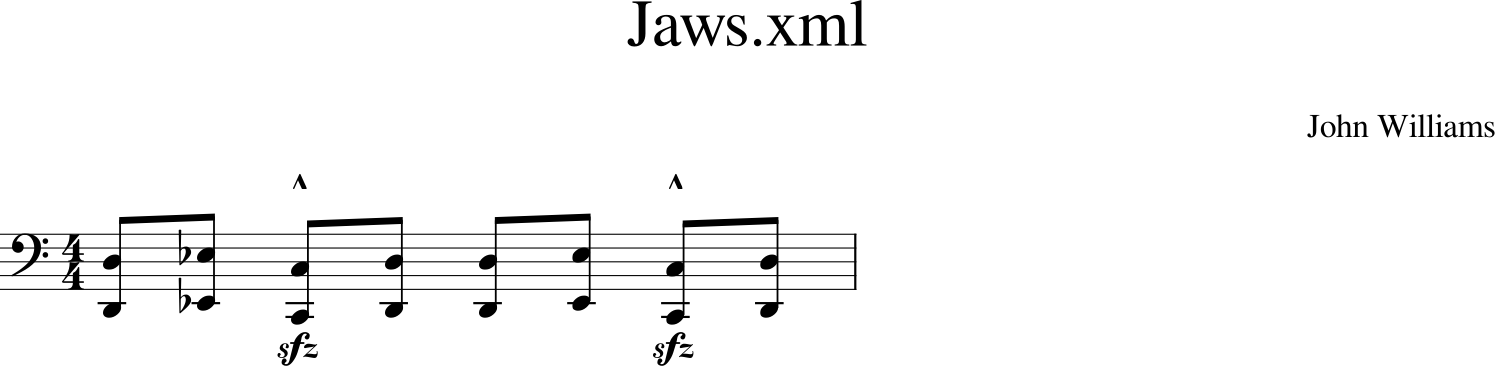

In [6]:
def rastreamento_oitavas(measure):
  for i in range(len(measure.notes) - 1):
    note1 = measure.notes[i]
    note2 = measure.notes[i + 1]
    if note1.isChord and note2.isChord:
      for pitch1 in note1.pitches:
        for pitch2 in note2.pitches:
          if interval.Interval(pitch1, pitch2).name == 'P8':
            print(note1, note2)
            return True
  return False

for part in target_score.parts:
  for measure in part.getElementsByClass('Measure'):
    if rastreamento_oitavas(measure):
      print(f'Parallel octaves found in measure {measure.number} of part {part.id}\n')
      measure.show()


## Contorno Melódico

### Leitura e definição de musemas de comparação Melódica

Bloco 7

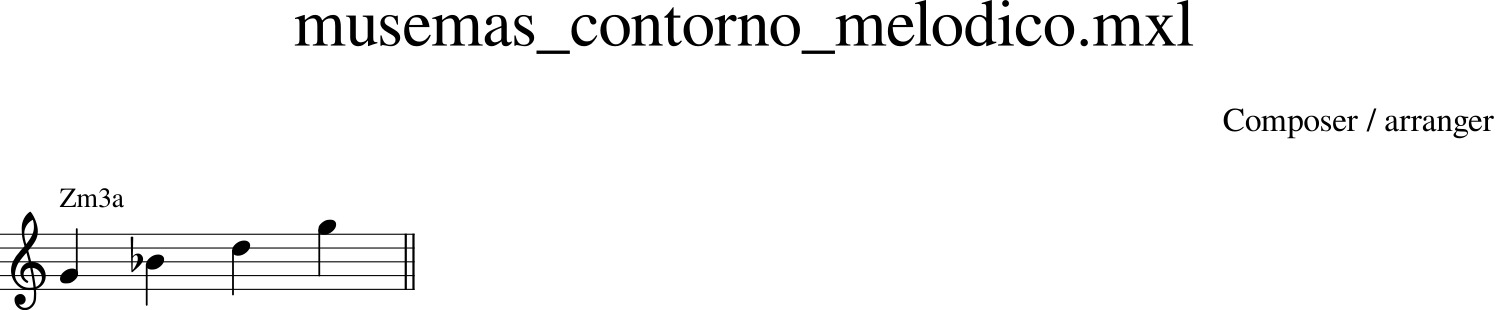

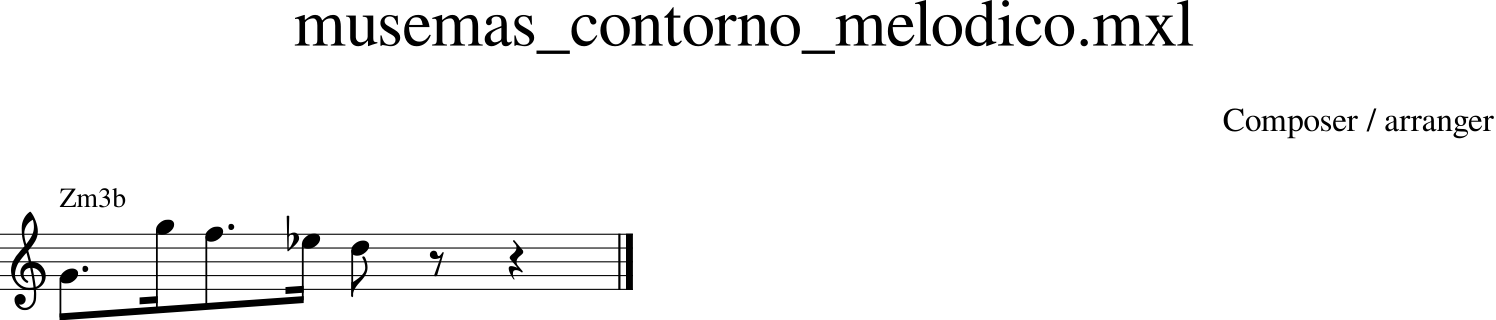

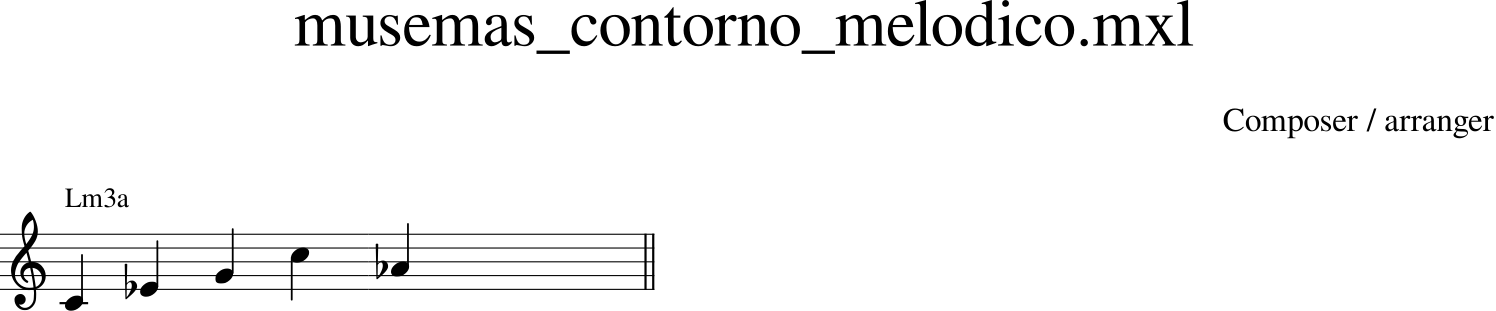

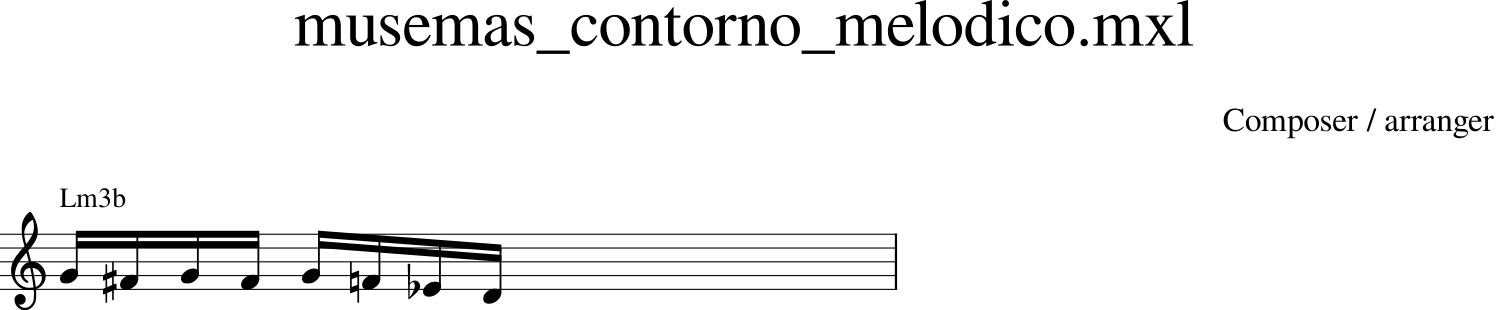

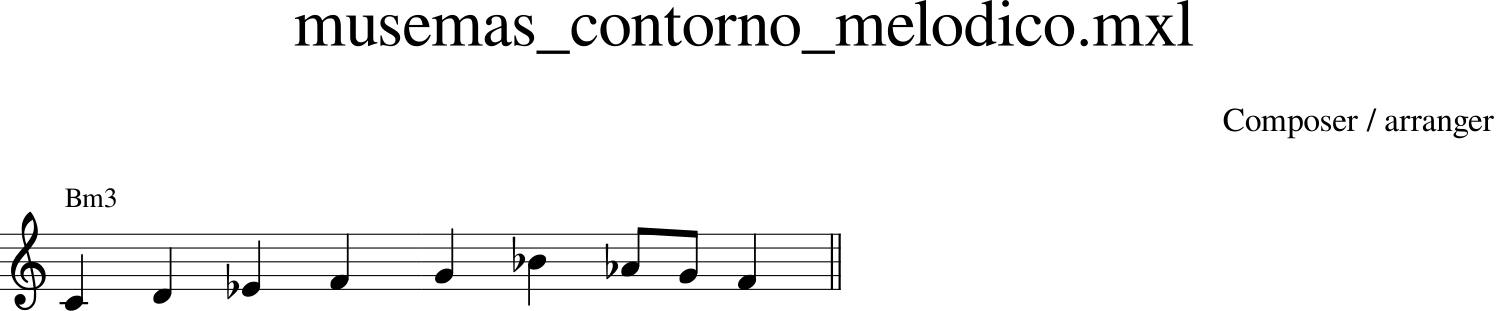

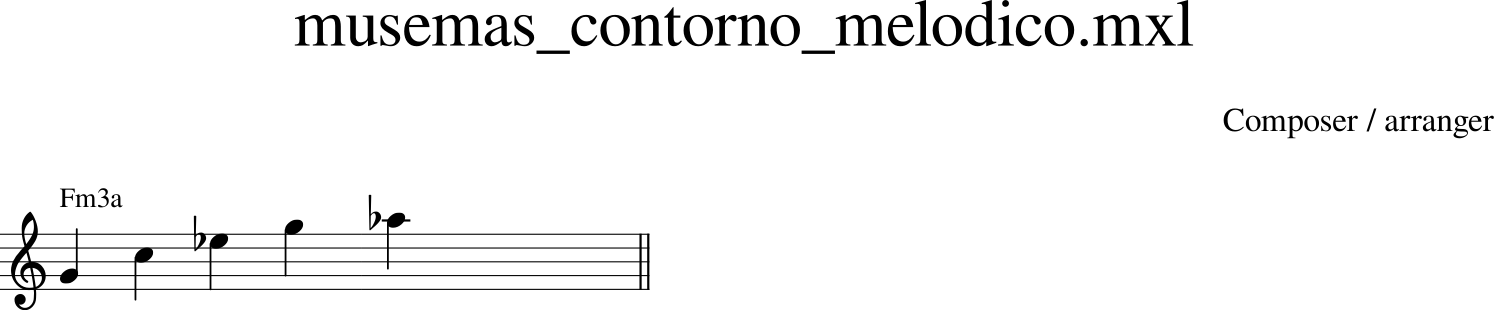

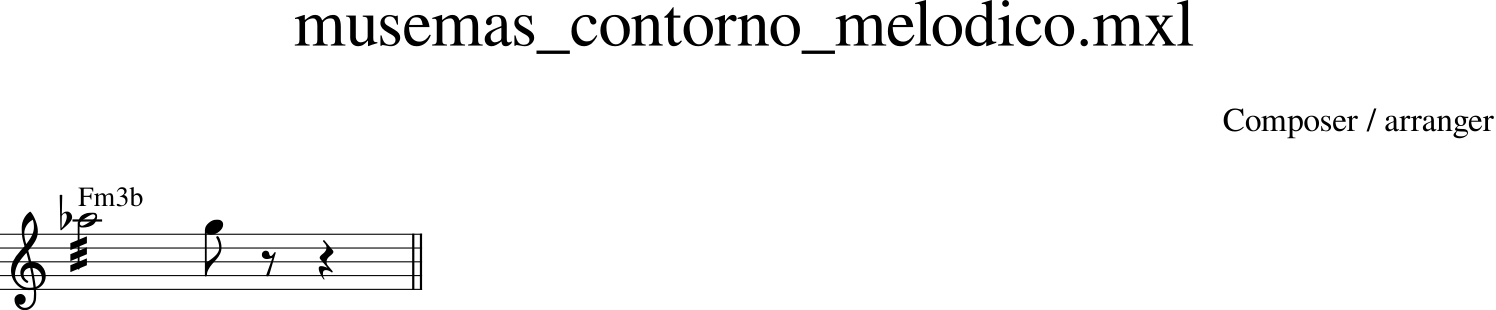

In [7]:
query = converter.parse("/content/drive/MyDrive/PROJETO/MC-MATERIALDECOMPARACAO/musemas_contorno_melodico.mxl")
# query.show()

m3_zamecnik = query.measure(1)
m3_zamecnik.show()

m3_zamecnik_b = query.measure(10)
m3_zamecnik_b.show()


print('\n')

m3_lamp = query.measures(2, 3)
m3_lamp.show()

m3_lamp_b = query.measure(4)
m3_lamp_b.show()

print('\n')

m3_borch = query.measures(5, 6)
m3_borch.show()

print('\n')

m3_malvin = query.measures(7, 8)
m3_malvin.show()

m3_malvin_b = query.measure(9)
m3_malvin_b.show()

### **musemas**

m3_zamecnik

m3_lamp

m3_borch

m3_malvin

Bloco 8

In [8]:
#---- Queries - Tratamento musema
m3_target = m3_malvin

musema, musema_intervalos, musema_contorno = [], [], []

for i in m3_target.flatten().notes:
  musema.append(i)


# Lista de intervalos e contornos melódicos do MUSEMA---
temp_musema =[]
for mu in musema:
  if mu.isChord:
    temp_musema.append(mu[-1])
  else:
    temp_musema.append(mu)
for nota in range(len(temp_musema)-1):
  musema_intervalos.append(interval.Interval(
      temp_musema[nota], temp_musema[nota+1]).niceName)
  musema_contorno.append(interval.Interval(
      temp_musema[nota], temp_musema[nota+1]).direction)

Bloco 8A

In [9]:
#---- Queries - Tratamento musema
musema_B = musema.copy()

musema_B.pop(0)


# Lista de intervalos e contornos melódicos do MUSEMA---

temp_mzB, musema_B_contorno, musema_B_intervalos = [], [], []

for mu in musema_B:
  if mu.isChord:
    temp_mzB.append(mu[-1])
  else:
    temp_mzB.append(mu)
for nota in range(len(temp_mzB)-1):
  musema_B_intervalos.append(interval.Interval(
      temp_mzB[nota], temp_mzB[nota+1]).niceName)
  musema_B_contorno.append(interval.Interval(
      temp_mzB[nota], temp_mzB[nota+1]).direction)

Bloco 8B

In [10]:
#---- Queries - Tratamento musema
m3b_target = m3_malvin_b

mb_musema, mb_musema_intervalos, mb_musema_contorno = [], [], []

for i in m3b_target.flatten().notes:
  mb_musema.append(i)


# Lista de intervalos e contornos melódicos do MUSEMA---
mb_temp_musema =[]
for mu in mb_musema:
  if mu.isChord:
    mb_temp_musema.append(mu[-1])
  else:
    mb_temp_musema.append(mu)
for nota in range(len(mb_temp_musema)-1):
  mb_musema_intervalos.append(interval.Interval(
      mb_temp_musema[nota], mb_temp_musema[nota+1]).niceName)
  mb_musema_contorno.append(interval.Interval(
      mb_temp_musema[nota], mb_temp_musema[nota+1]).direction)

Bloco 9

In [11]:
print(musema)
print(musema_intervalos)
print(musema_contorno)

[<music21.note.Note G>, <music21.note.Note C>, <music21.note.Note E->, <music21.note.Note G>, <music21.note.Note A->]
['Perfect Fourth', 'Minor Third', 'Major Third', 'Minor Second']
[<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>]


Bloco 9A

In [12]:
print(musema_B)
print(musema_B_intervalos)
print(musema_B_contorno)

[<music21.note.Note C>, <music21.note.Note E->, <music21.note.Note G>, <music21.note.Note A->]
['Minor Third', 'Major Third', 'Minor Second']
[<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>]


Bloco 9B

In [13]:
print(mb_musema)
print(mb_musema_intervalos)
print(mb_musema_contorno)

[<music21.note.Note A->, <music21.note.Note G>]
['Minor Second']
[<Direction.DESCENDING: -1>]


### Coleta de dados da peça

Bloco 10

In [14]:
# Lista de notas------
for notas_ in target_.flatten().notes:
  lista_notas.append(notas_)
#---------------------//

# Lista de intervalos e contornos melódicos---
temp_target = []
for ni in lista_notas:
  if ni.isChord:
    temp_target.append(ni[-1])
  else:
    temp_target.append(ni)

for nota in range(len(temp_target)-1):
  lista_intervalos.append(interval.Interval(
      temp_target[nota], temp_target[nota+1]).niceName)
  lista_contorno.append(interval.Interval(
      temp_target[nota], temp_target[nota+1]).direction)
#-----------------------//

### Demonstração do material coletado

Bloco 11

In [15]:
_index = 1
print("Index - measure :: nota | offset  ->  contorno intervalar\n")

for _direction, _interval, _nota in zip(lista_contorno, lista_intervalos, lista_notas):

  print(_index, "  -  ", _nota.measureNumber,"  ::  ",_nota, "   |   ", _nota.offset, "  ->   ", _direction.name, _interval)
  _index += 1

Index - measure :: nota | offset  ->  contorno intervalar

1   -   5   ::   <music21.note.Note E->    |    17.0   ->    ASCENDING Major Third
2   -   5   ::   <music21.note.Note G>    |    17.25   ->    ASCENDING Minor Third
3   -   5   ::   <music21.note.Note B->    |    17.5   ->    OBLIQUE Perfect Unison
4   -   5   ::   <music21.note.Note B->    |    18.0   ->    OBLIQUE Perfect Unison
5   -   6   ::   <music21.note.Note B->    |    20.0   ->    DESCENDING Perfect Fifth
6   -   7   ::   <music21.note.Note E->    |    24.5   ->    ASCENDING Major Third
7   -   7   ::   <music21.note.Note G>    |    24.75   ->    ASCENDING Diminished Fifth
8   -   7   ::   <music21.note.Note D->    |    25.0   ->    ASCENDING Major Second
9   -   7   ::   <music21.note.Note E->    |    25.25   ->    DESCENDING Perfect Fourth
10   -   7   ::   <music21.note.Note B->    |    25.5   ->    DESCENDING Perfect Fifth
11   -   7   ::   <music21.note.Note E->    |    25.75   ->    DESCENDING Major Second
12  

### Tratamento nGram (janelas de busca)

##### Bloco 12

In [16]:
nGram_notas, nGram_intervalos, nGram_contorno, resultados_ = [], [], [], []

N = len(musema_contorno)

#---- Tratamento de busca nGram
for i in range(len(lista_contorno)-N):
  '''i equivale à janela de Busca no tamanho N'''
  nGram_contorno.append(lista_contorno[i:i+N])
  nGram_intervalos.append(lista_intervalos[i:i+N])
  nGram_notas.append(lista_notas[i:i+N+1])


print("Musema mat. ref. = \n", musema_contorno, "\n",
      musema_intervalos, "\n",
      musema
      )
print("------\n Rastreamento do Musema no OA = \n")
for busca, janela_nGram, intervalo in zip(nGram_contorno, nGram_notas
                                          , nGram_intervalos):

  if busca == musema_contorno:
    notas_busca = janela_nGram
    resultados_.append(notas_busca)
    # %debug
    if not janela_nGram:
      break
    else:
      compasso_busca = janela_nGram[0].measureNumber
      print("\n", busca, "\n", intervalo, "\n", notas_busca, "\n")
    # %debug
#---- nGram ----//


Musema mat. ref. = 
 [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>] 
 ['Perfect Fourth', 'Minor Third', 'Major Third', 'Minor Second'] 
 [<music21.note.Note G>, <music21.note.Note C>, <music21.note.Note E->, <music21.note.Note G>, <music21.note.Note A->]
------
 Rastreamento do Musema no OA = 


 [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>] 
 ['Major Third', 'Diminished Fifth', 'Augmented Fourth', 'Perfect Fourth'] 
 [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note E->, <music21.note.Note A>, <music21.note.Note D>] 



##### Bloco 12A

In [17]:
nGram_notas_mz_B, nGram_intervalos_mz_B, nGram_contorno_mz_B, resultados_mz_B = [], [], [], []

N = len(musema_B_contorno)


for i in range(len(lista_contorno)-N):
  '''i equivale à janela de Busca no tamanho N'''
  nGram_contorno_mz_B.append(lista_contorno[i:i+N])
  nGram_intervalos_mz_B.append(lista_intervalos[i:i+N])
  nGram_notas_mz_B.append(lista_notas[i:i+N+1])


print("Musema mat. ref. = \n", musema_B_contorno, "\n",
      nGram_intervalos_mz_B, "\n",
      musema_B
      )
print("------\n Rastreamento do Musema no OA = \n")
for busca, janela_nGram, intervalo in zip(nGram_contorno_mz_B, nGram_notas_mz_B
                                          , nGram_intervalos_mz_B):

  if busca == musema_B_contorno:
    notas_busca = janela_nGram
    resultados_mz_B.append(notas_busca)
    if not janela_nGram:
      break
    else:
      compasso_busca = janela_nGram[0].measureNumber
      print("\n", busca, "\n", intervalo, "\n", notas_busca, "\n")

Musema mat. ref. = 
 [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>] 
 [['Major Third', 'Minor Third', 'Perfect Unison'], ['Minor Third', 'Perfect Unison', 'Perfect Unison'], ['Perfect Unison', 'Perfect Unison', 'Perfect Fifth'], ['Perfect Unison', 'Perfect Fifth', 'Major Third'], ['Perfect Fifth', 'Major Third', 'Diminished Fifth'], ['Major Third', 'Diminished Fifth', 'Major Second'], ['Diminished Fifth', 'Major Second', 'Perfect Fourth'], ['Major Second', 'Perfect Fourth', 'Perfect Fifth'], ['Perfect Fourth', 'Perfect Fifth', 'Major Second'], ['Perfect Fifth', 'Major Second', 'Perfect Unison'], ['Major Second', 'Perfect Unison', 'Major Second'], ['Perfect Unison', 'Major Second', 'Major Third'], ['Major Second', 'Major Third', 'Diminished Fifth'], ['Major Third', 'Diminished Fifth', 'Minor Sixth'], ['Diminished Fifth', 'Minor Sixth', 'Major Third'], ['Minor Sixth', 'Major Third', 'Diminished Fifth'], ['Major Third', 'Diminished Fifth', 'Perfect Octave']

Bloco 12B

In [18]:
nGram_notas_mz_c, nGram_intervalos_mz_c, nGram_contorno_mz_c, resultados_mz_c = [], [], [], []

N = len(mb_musema)


for i in range(len(lista_contorno)-N):
  '''i equivale à janela de Busca no tamanho N'''
  nGram_contorno_mz_c.append(lista_contorno[i:i+N])
  nGram_intervalos_mz_c.append(lista_intervalos[i:i+N])
  nGram_notas_mz_c.append(lista_notas[i:i+N+1])


print("Musema mat. ref. = \n", nGram_contorno_mz_c, "\n",
      nGram_intervalos_mz_c, "\n",
      mb_musema
      )
print("------\n Rastreamento do Musema no OA = \n")
for busca, janela_nGram, intervalo in zip(nGram_contorno_mz_c, nGram_notas_mz_c
                                          , nGram_intervalos_mz_c):

  if busca == mb_musema:
    notas_busca = janela_nGram
    resultados_mz_B.append(notas_busca)
    if not janela_nGram:
      break
    else:
      compasso_busca = janela_nGram[0].measureNumber
      print("\n", busca, "\n", intervalo, "\n", notas_busca, "\n")

Musema mat. ref. = 
 [[<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.OBLIQUE: 0>], [<Direction.OBLIQUE: 0>, <Direction.OBLIQUE: 0>], [<Direction.OBLIQUE: 0>, <Direction.DESCENDING: -1>], [<Direction.DESCENDING: -1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.DESCENDING: -1>], [<Direction.DESCENDING: -1>, <Direction.DESCENDING: -1>], [<Direction.DESCENDING: -1>, <Direction.DESCENDING: -1>], [<Direction.DESCENDING: -1>, <Direction.OBLIQUE: 0>], [<Direction.OBLIQUE: 0>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.DESCENDING: -1>], [<Direction.DESCENDING: -1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.ASCENDING: 1>], [<Direction.ASCENDING: 1>, <Direction.DESCENDING: -1

### Demonstração via artefatos

Bloco 13

Compasso 25


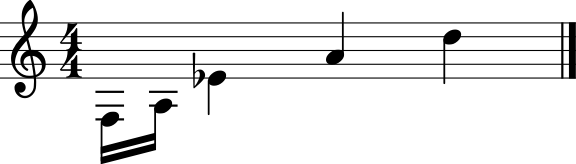

In [19]:
for resultado in resultados_:
  imp = stream.Stream()
  if not resultado:
    break
  else:
    print("Compasso", resultado[0].measureNumber)
    for staff in resultado:
      imp.append(staff)
    imp.show()
    imp.show('midi')
    print("\n")

Bloco 13A

Compasso 7


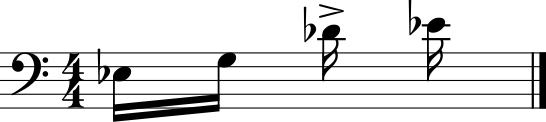



Compasso 8


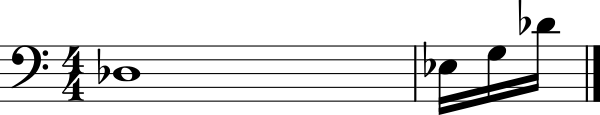



Compasso 11


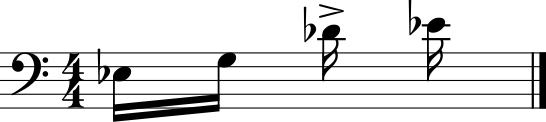



Compasso 12


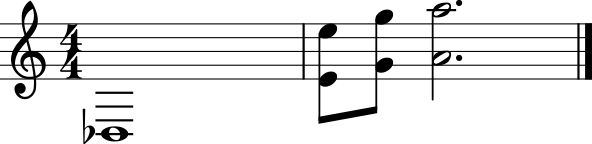



Compasso 16


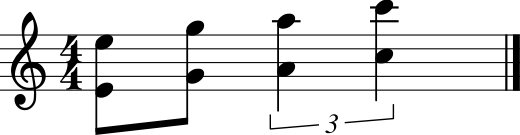



Compasso 21


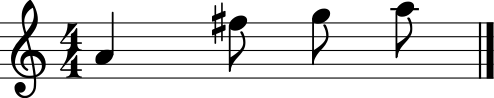



Compasso 25


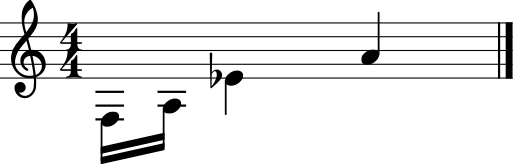



Compasso 25


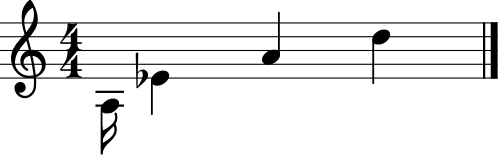



Compasso 26


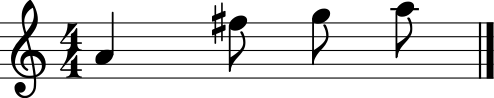



Compasso 28


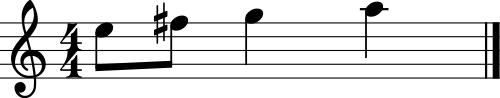

In [20]:
for resultado in resultados_mz_B:
  imp = stream.Stream()
  if not resultado:
    break
  else:
    print("Compasso", resultado[0].measureNumber)
    for staff in resultado:
      imp.append(staff)
    imp.show()
    imp.show('midi')
    print("\n")

Bloco 13B

In [21]:
for resultado in resultados_mz_c:
  imp = stream.Stream()
  if not resultado:
    break
  else:
    print("Compasso", resultado[0].measureNumber)
    for staff in resultado:
      imp.append(staff)
    imp.show()
    imp.show('midi')
    print("\n")

## Análise Rítmica

Bloco 14

Instâncias: 12 | Padrão: 'd'
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.dynamics.Dynamic mf>
{0.0} <music21.note.Rest whole>



Compasso:  1    Clave/voz:  P1-Staff1


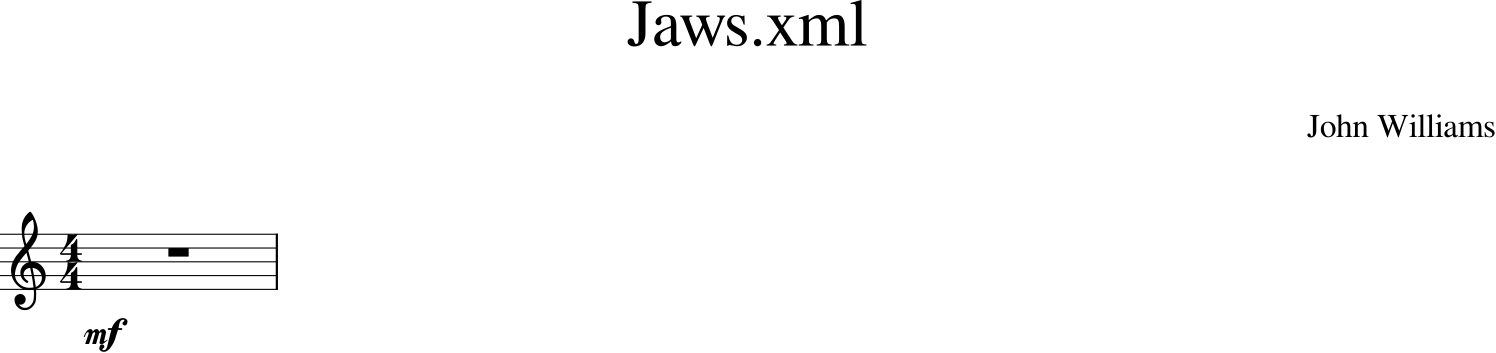


Compasso:  2    Clave/voz:  P1-Staff1


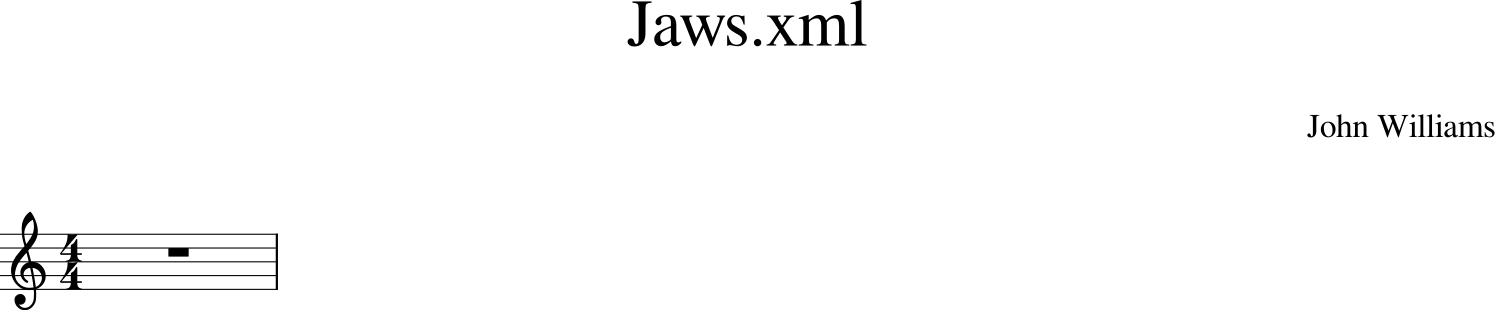


Compasso:  3    Clave/voz:  P1-Staff1


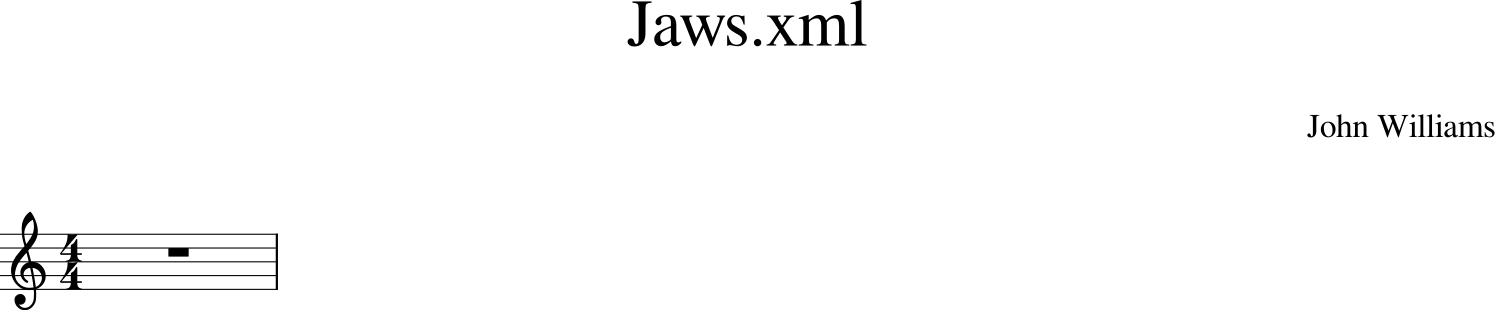


Compasso:  4    Clave/voz:  P1-Staff1


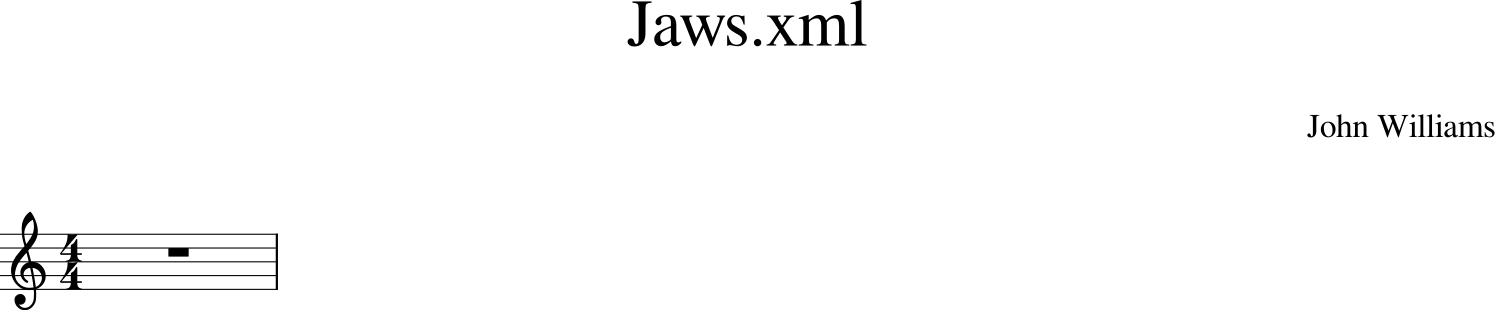


Compasso:  6    Clave/voz:  P1-Staff1


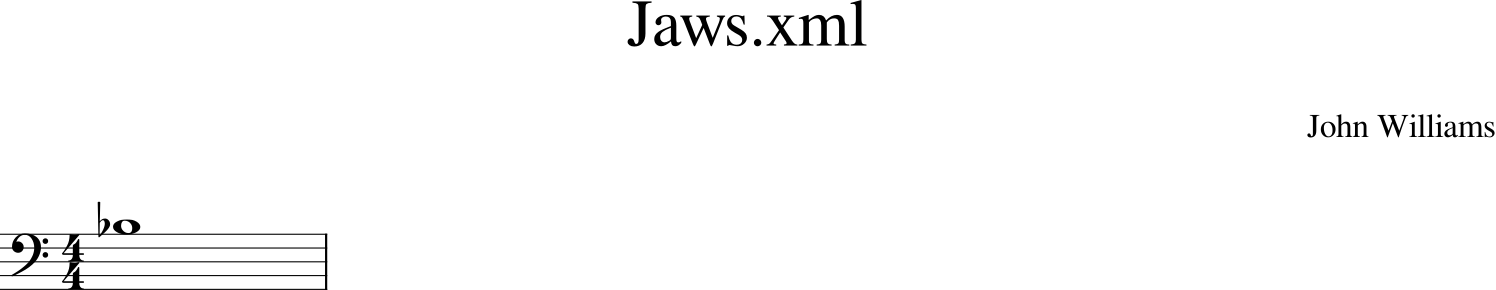


Compasso:  8    Clave/voz:  P1-Staff1


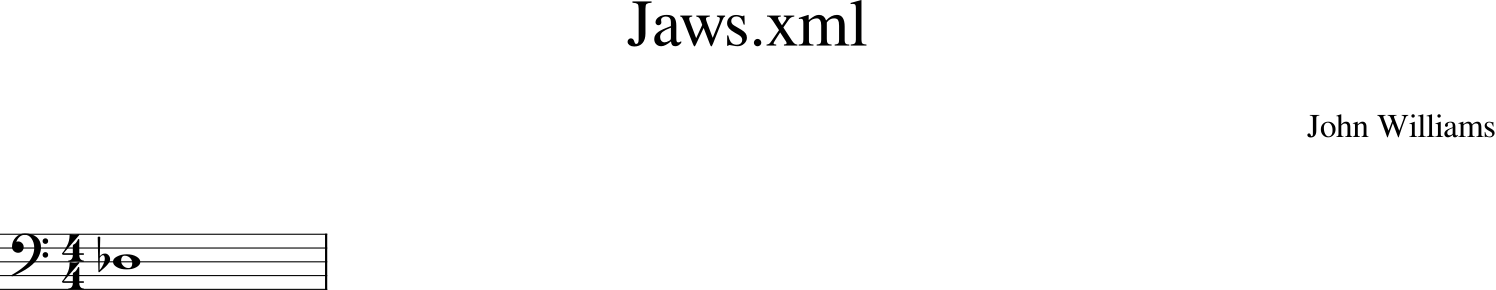


Compasso:  10    Clave/voz:  P1-Staff1


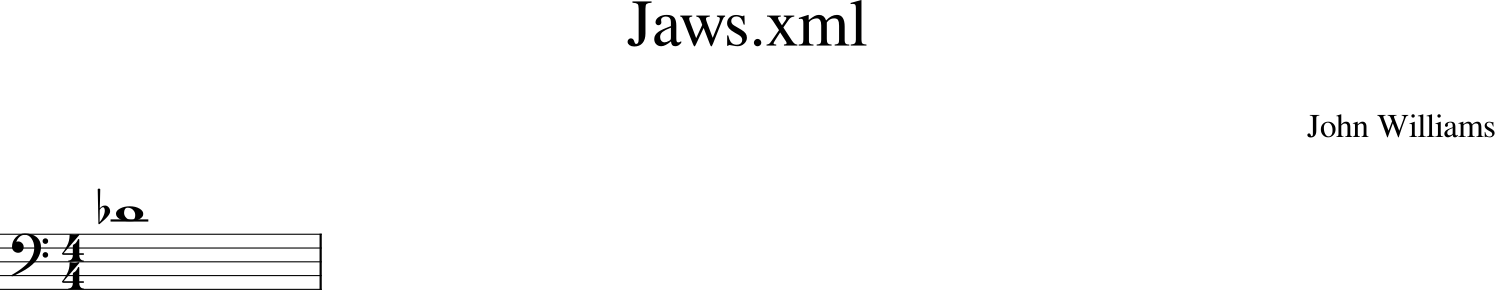


Compasso:  12    Clave/voz:  P1-Staff1


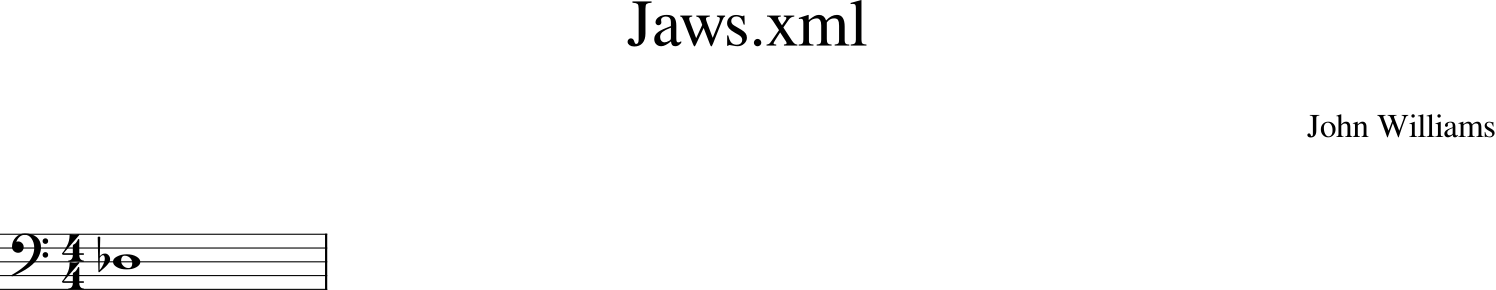


Compasso:  13    Clave/voz:  P1-Staff1


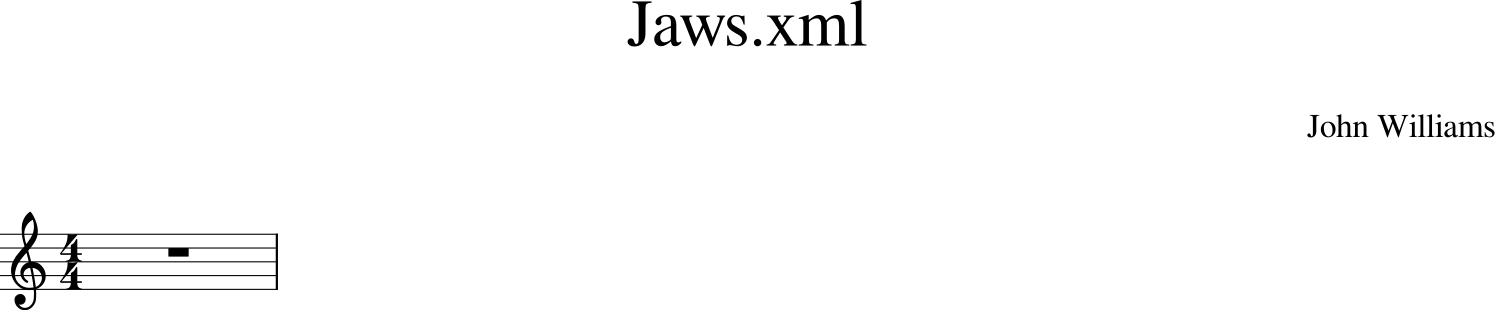


Compasso:  19    Clave/voz:  P1-Staff1


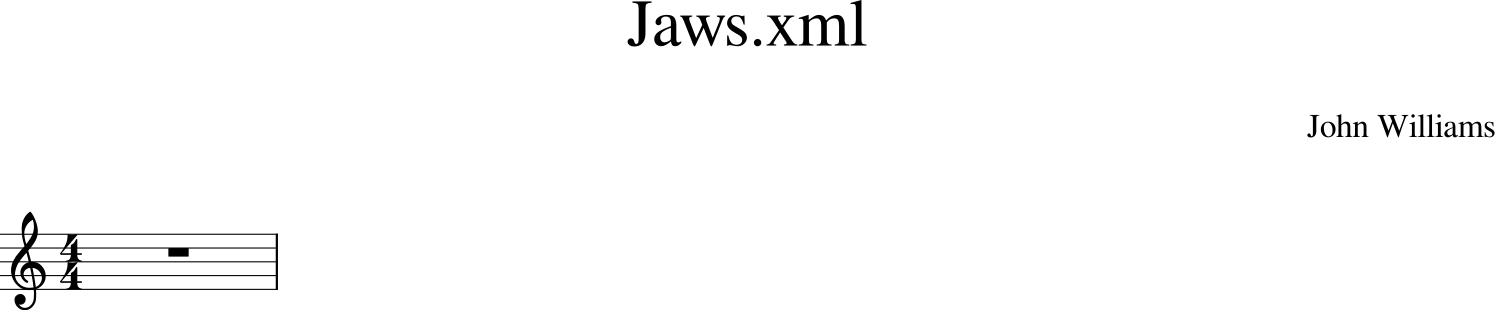


Compasso:  31    Clave/voz:  P1-Staff1


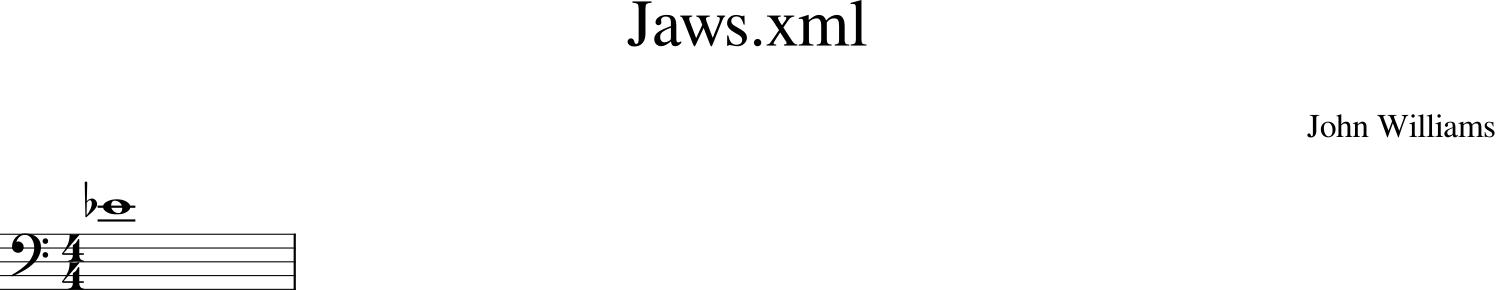


Compasso:  33    Clave/voz:  P1-Staff1


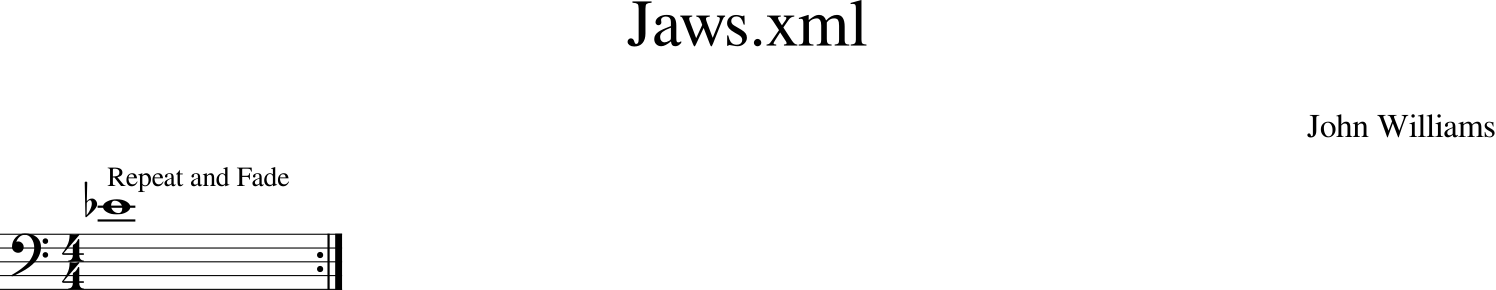

Compasso: [(1, 'P1-Staff1'), (2, 'P1-Staff1'), (3, 'P1-Staff1'), (4, 'P1-Staff1'), (6, 'P1-Staff1'), (8, 'P1-Staff1'), (10, 'P1-Staff1'), (12, 'P1-Staff1'), (13, 'P1-Staff1'), (19, 'P1-Staff1'), (31, 'P1-Staff1'), (33, 'P1-Staff1')]
-----


Instâncias: 2 | Padrão: 'F<<<<<<Z'
{0.0} <music21.note.Rest eighth>
{0.5} <music21.note.Note C>
{0.75} <music21.note.Note E>
{1.0} <music21.note.Note B->
{1.25} <music21.note.Note C>
{1.5} <music21.note.Note G>
{1.75} <music21.note.Note C>
{2.0} <music21.note.Note B->



Compasso:  7    Clave/voz:  P1-Staff1


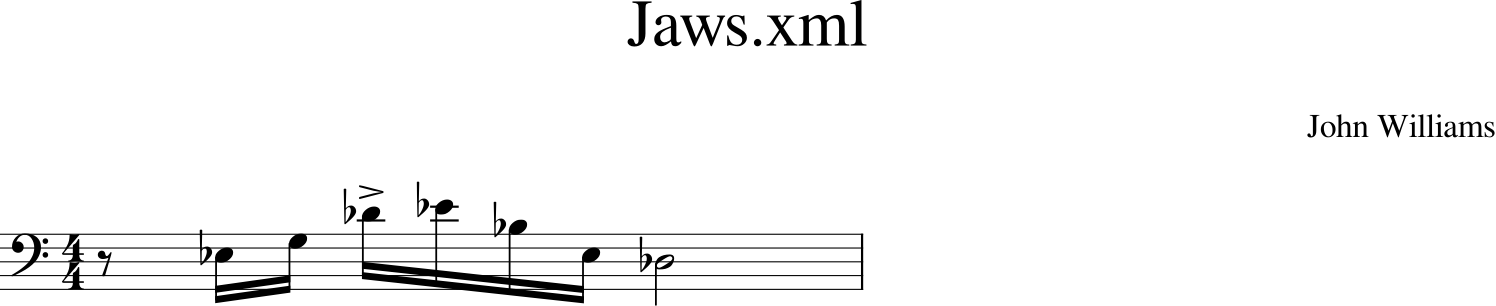


Compasso:  11    Clave/voz:  P1-Staff1


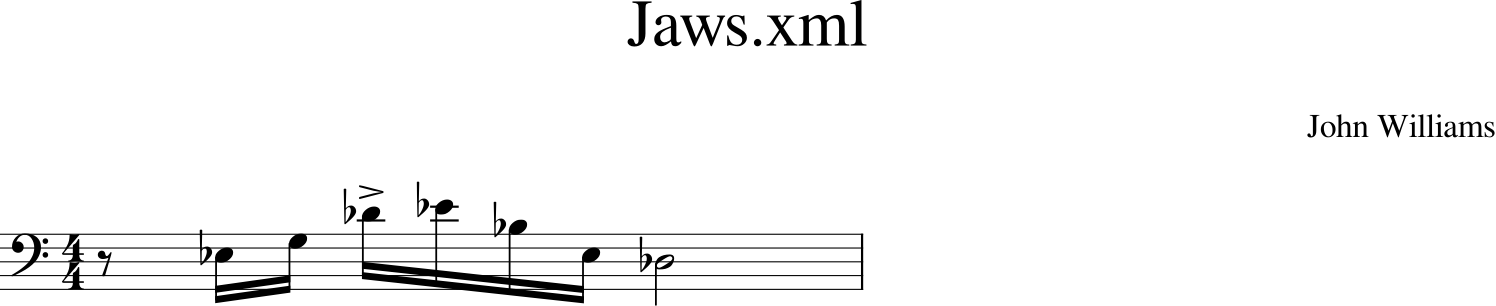

Compasso: [(7, 'P1-Staff1'), (11, 'P1-Staff1')]
-----


Instâncias: 2 | Padrão: 'F<<<<<<<<<<P'
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.note.Rest eighth>
{0.5} <music21.note.Note C>
{0.75} <music21.note.Note E>
{1.0} <music21.note.Note B->
{1.25} <music21.note.Rest 16th>
{1.5} <music21.note.Note D>
{1.75} <music21.note.Note F#>
{2.0} <music21.note.Note C>
{2.25} <music21.note.Rest 16th>
{2.5} <music21.note.Note C>
{2.75} <music21.note.Note E>
{3.0} <music21.note.Note B->



Compasso:  9    Clave/voz:  P1-Staff1


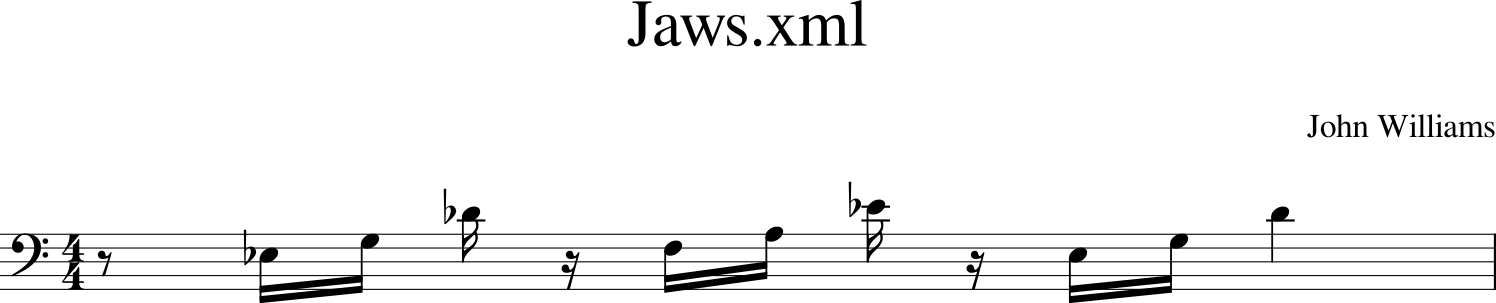


Compasso:  32    Clave/voz:  P1-Staff1


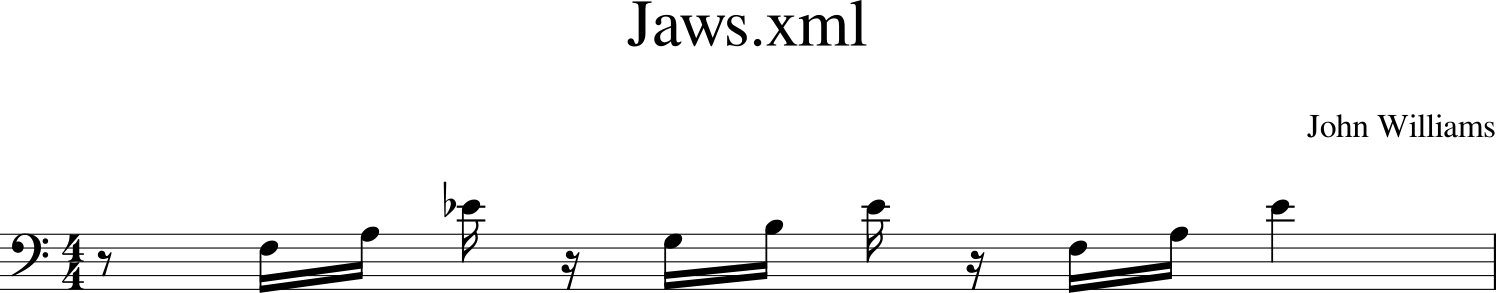

Compasso: [(9, 'P1-Staff1'), (32, 'P1-Staff1')]
-----


Instâncias: 2 | Padrão: 'PPPP'
{0.0} <music21.note.Note B->
{1.0} <music21.note.Note F>
{2.0} <music21.note.Note C>
{3.0} <music21.note.Note F>



Compasso:  21    Clave/voz:  P1-Staff1


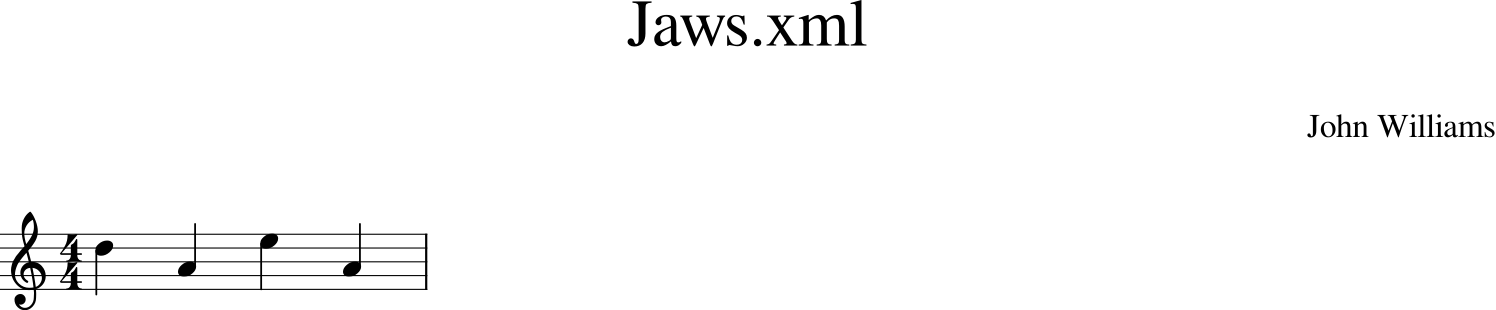


Compasso:  26    Clave/voz:  P1-Staff1


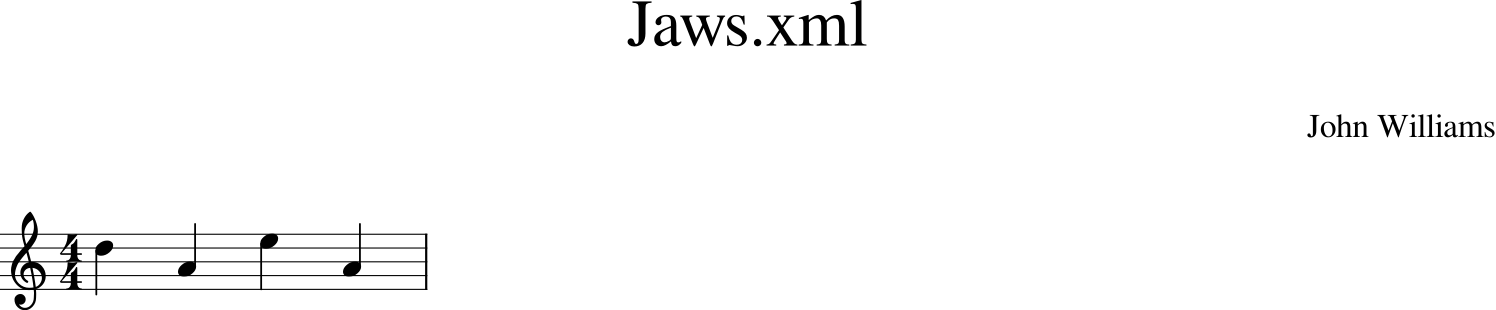

Compasso: [(21, 'P1-Staff1'), (26, 'P1-Staff1')]
-----


Instâncias: 2 | Padrão: 'FFFFPP'
{0.0} <music21.note.Note A>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note C>
{1.5} <music21.note.Note A>
{2.0} <music21.note.Note G>
{3.0} <music21.note.Note C>



Compasso:  22    Clave/voz:  P1-Staff1


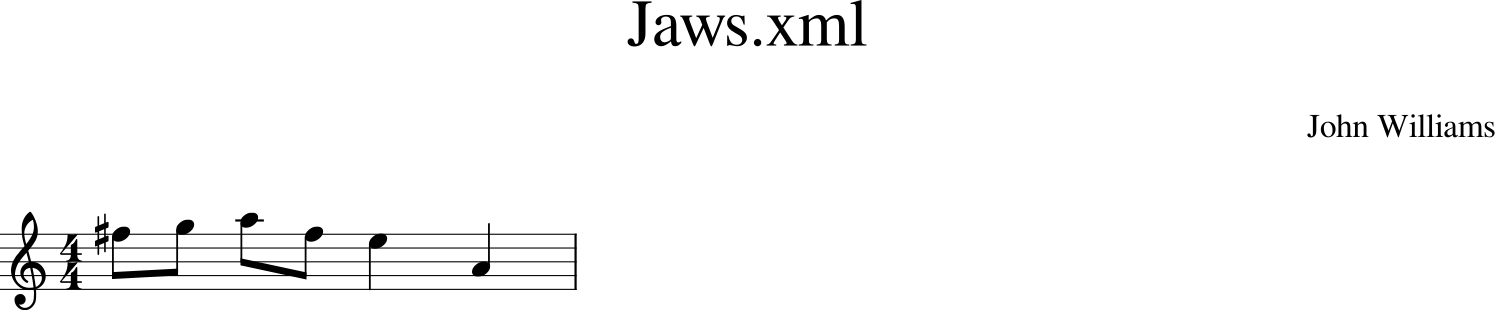


Compasso:  27    Clave/voz:  P1-Staff1


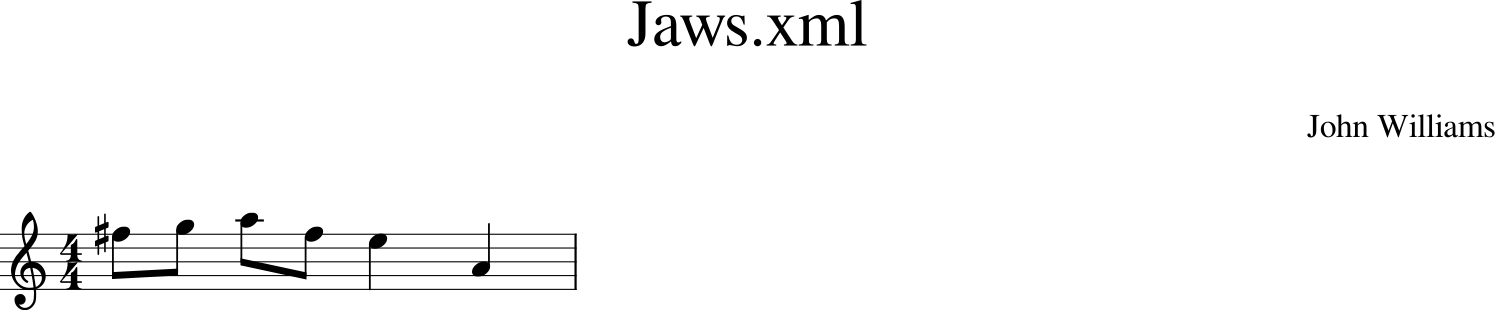

Compasso: [(22, 'P1-Staff1'), (27, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'P<<FZ'
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.clef.BassClef>
{0.0} <music21.note.Rest quarter>
{1.0} <music21.note.Note F>
{1.25} <music21.note.Note A>
{1.5} <music21.note.Note C>
{2.0} <music21.note.Note C>



Compasso:  5    Clave/voz:  P1-Staff1


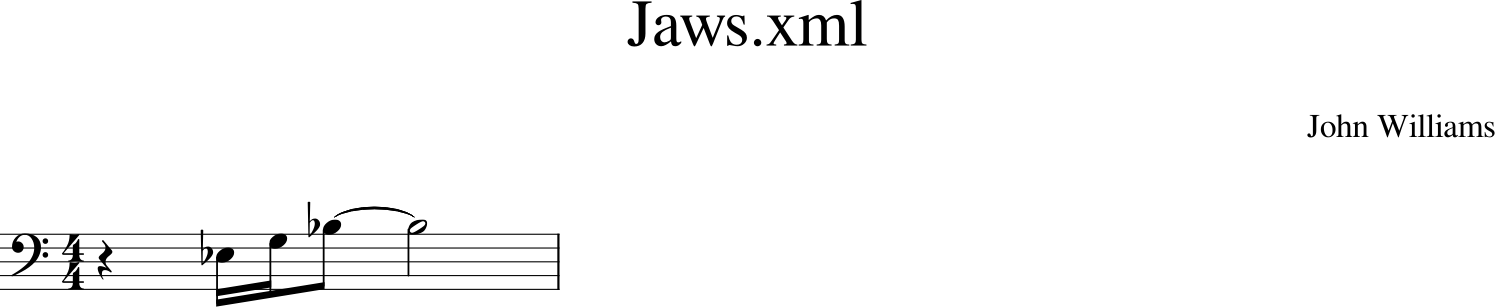

Compasso: [(5, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'ZPFF'
{0.0} <music21.note.Rest half>
{2.0} <music21.note.Rest quarter>
{3.0} <music21.chord.Chord E4 E5>
{3.5} <music21.chord.Chord G4 G5>



Compasso:  14    Clave/voz:  P1-Staff1


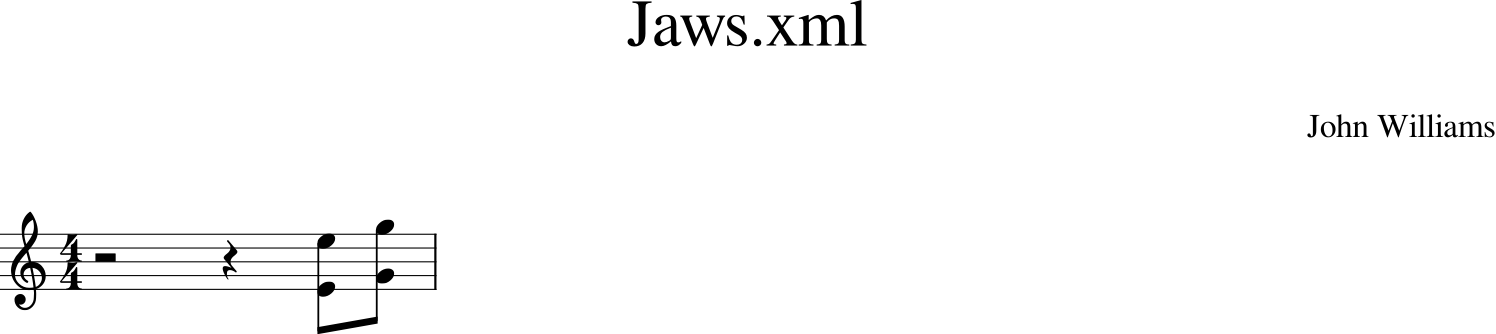

Compasso: [(14, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: '_P'
{0.0} <music21.chord.Chord A4 A5>
{3.0} <music21.chord.Chord G4 G5>



Compasso:  15    Clave/voz:  P1-Staff1


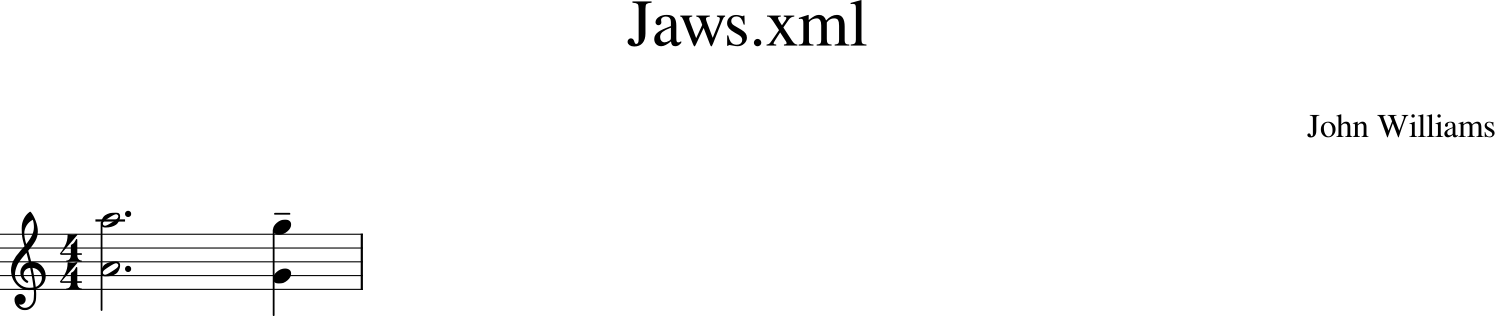

Compasso: [(15, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: '_FF'
{0.0} <music21.layout.PageLayout>
{0.0} <music21.chord.Chord G4 G5>
{3.0} <music21.chord.Chord E4 E5>
{3.5} <music21.chord.Chord G4 G5>



Compasso:  16    Clave/voz:  P1-Staff1


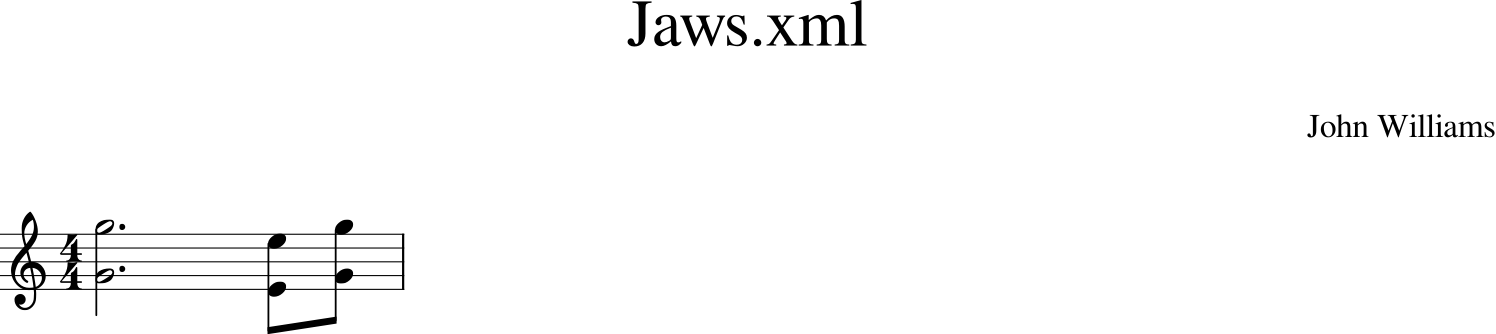

Compasso: [(16, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'JJJZ'
{0.0} <music21.chord.Chord A4 A5>
{0.6667} <music21.chord.Chord C5 C6>
{1.3333} <music21.chord.Chord B4 B5>
{2.0} <music21.chord.Chord A4 A5>



Compasso:  17    Clave/voz:  P1-Staff1


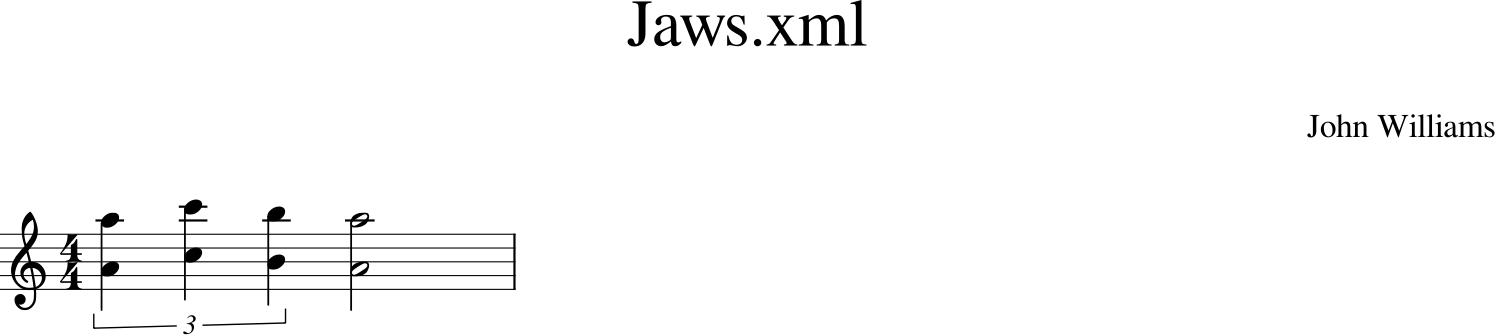

Compasso: [(17, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'ZZ'
{0.0} <music21.chord.Chord A4 A5>
{2.0} <music21.chord.Chord G4 G5>
{4.0} <music21.bar.Barline type=double>



Compasso:  18    Clave/voz:  P1-Staff1


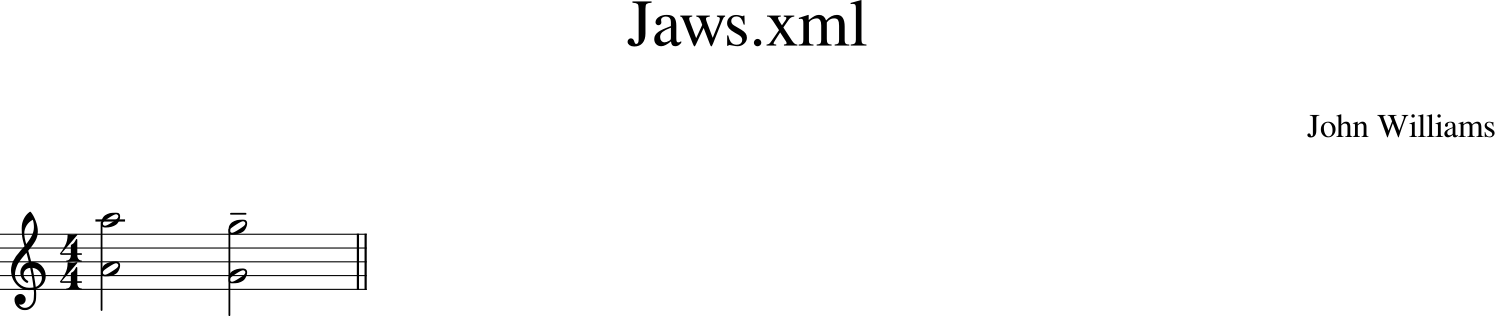

Compasso: [(18, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'ZPP'
{0.0} <music21.note.Rest half>
{2.0} <music21.note.Rest quarter>
{3.0} <music21.note.Note C>



Compasso:  20    Clave/voz:  P1-Staff1


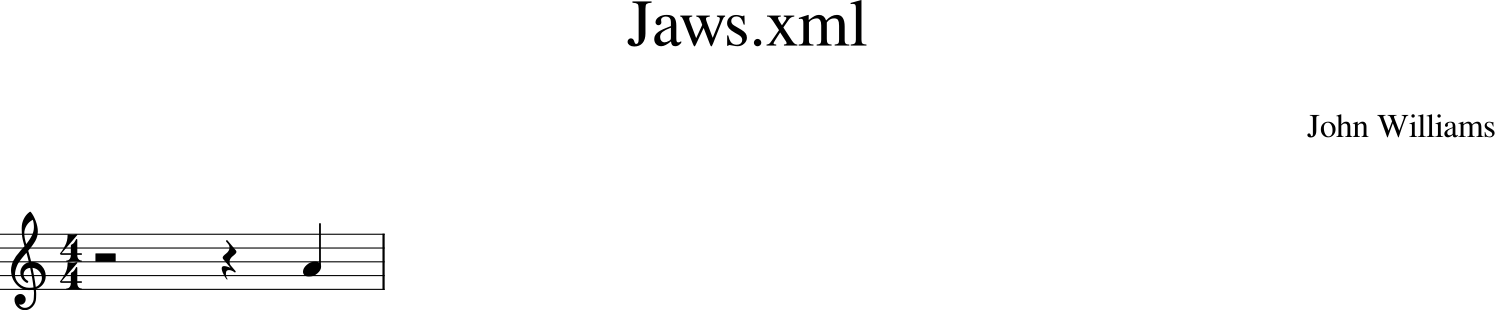

Compasso: [(20, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'PPFFFF'
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.note.Note G>
{1.0} <music21.note.Note D>
{2.0} <music21.note.Note A>
{2.5} <music21.note.Note C>
{3.0} <music21.note.Note B>
{3.5} <music21.note.Note A>



Compasso:  23    Clave/voz:  P1-Staff1


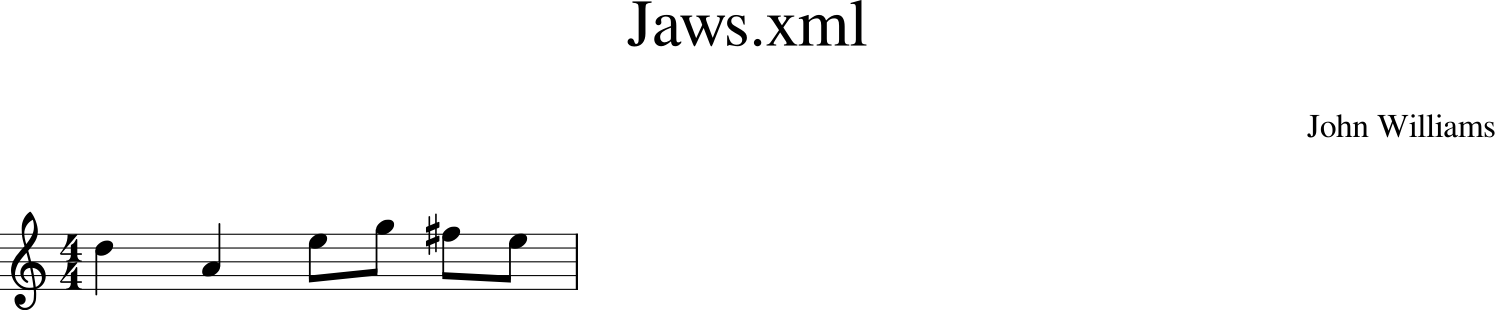

Compasso: [(23, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'FFZF<<'
{0.0} <music21.note.Note C>
{0.5} <music21.note.Note B->
{1.0} <music21.note.Note B->
{3.0} <music21.note.Rest eighth>
{3.5} <music21.clef.BassClef>
{3.5} <music21.note.Note F#>
{3.75} <music21.note.Note B->



Compasso:  24    Clave/voz:  P1-Staff1


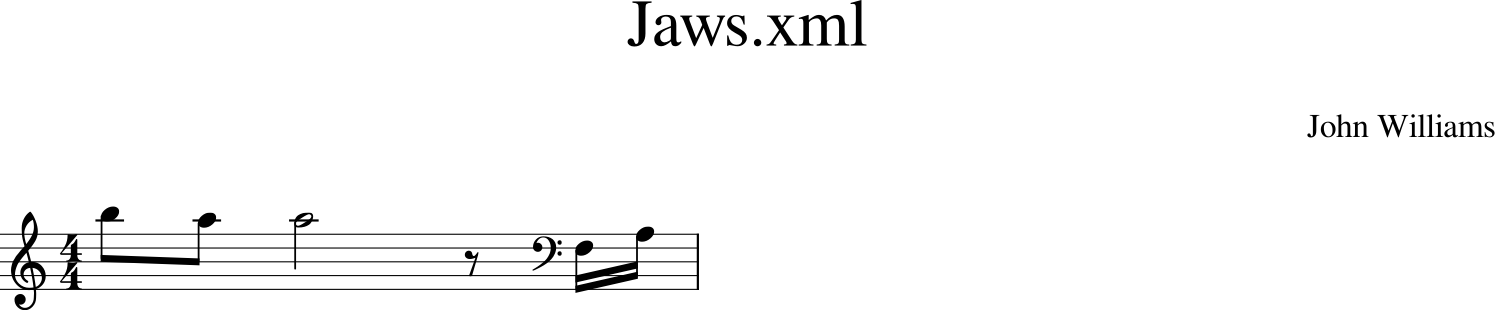

Compasso: [(24, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: '<<<<<<<<PP'
{0.0} <music21.note.Note F#>
{0.25} <music21.note.Rest 16th>
{0.5} <music21.note.Note B->
{0.75} <music21.note.Note D>
{1.0} <music21.note.Note G#>
{1.25} <music21.note.Rest 16th>
{1.5} <music21.note.Note G#>
{1.75} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.clef.TrebleClef>
{3.0} <music21.note.Note C>



Compasso:  25    Clave/voz:  P1-Staff1


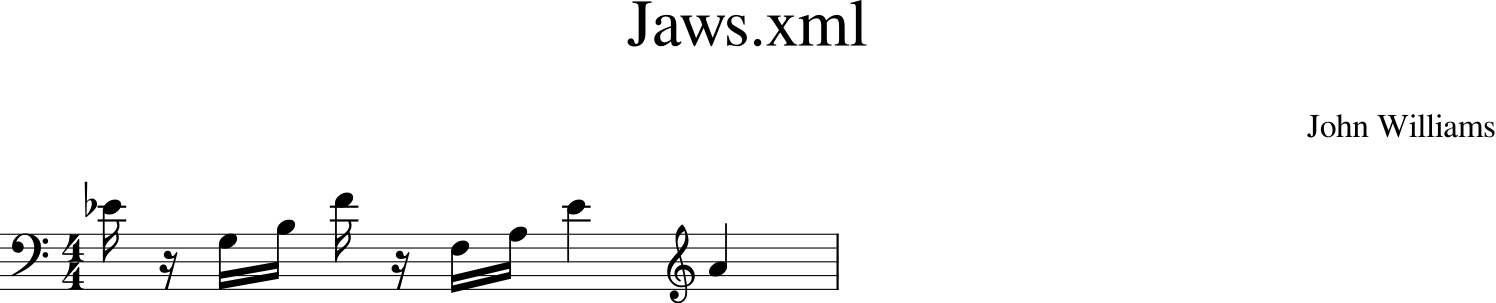

Compasso: [(25, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'PFFPP'
{0.0} <music21.note.Note C>
{1.0} <music21.note.Note G>
{1.5} <music21.note.Note A>
{2.0} <music21.note.Note B->
{3.0} <music21.note.Note C>



Compasso:  28    Clave/voz:  P1-Staff1


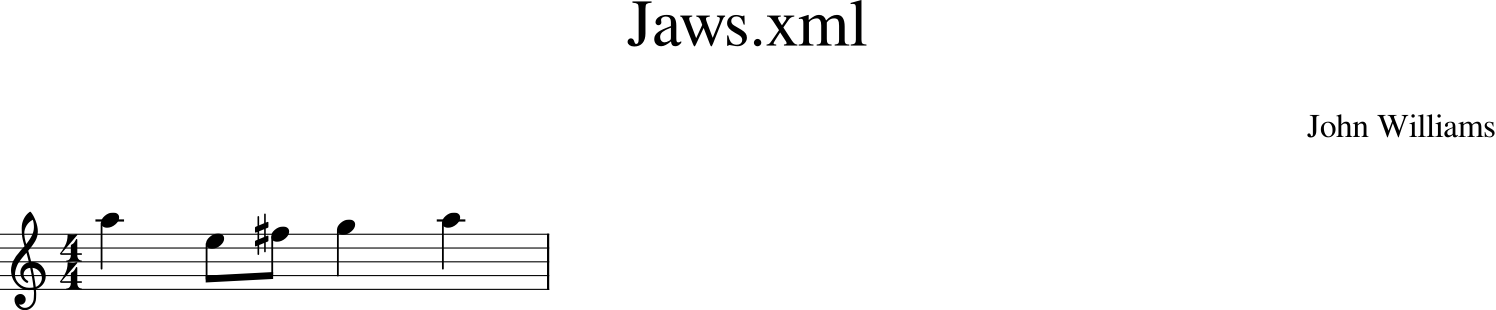

Compasso: [(28, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'P_'
{0.0} <music21.note.Note C>
{1.0} <music21.note.Note G#>



Compasso:  29    Clave/voz:  P1-Staff1


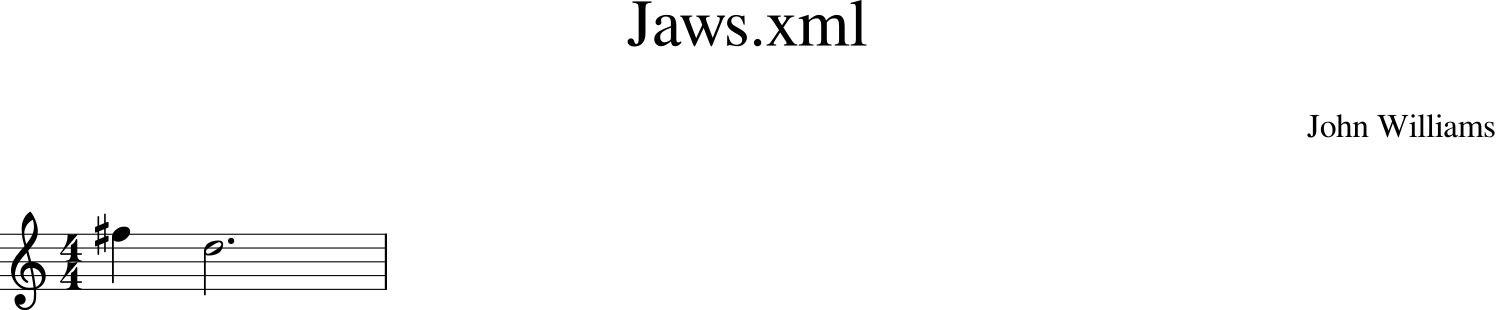

Compasso: [(29, 'P1-Staff1')]
-----


Instâncias: 1 | Padrão: 'F<<_'
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.clef.BassClef>
{0.0} <music21.note.Rest eighth>
{0.5} <music21.note.Note D>
{0.75} <music21.note.Note F#>
{1.0} <music21.note.Note C>



Compasso:  30    Clave/voz:  P1-Staff1


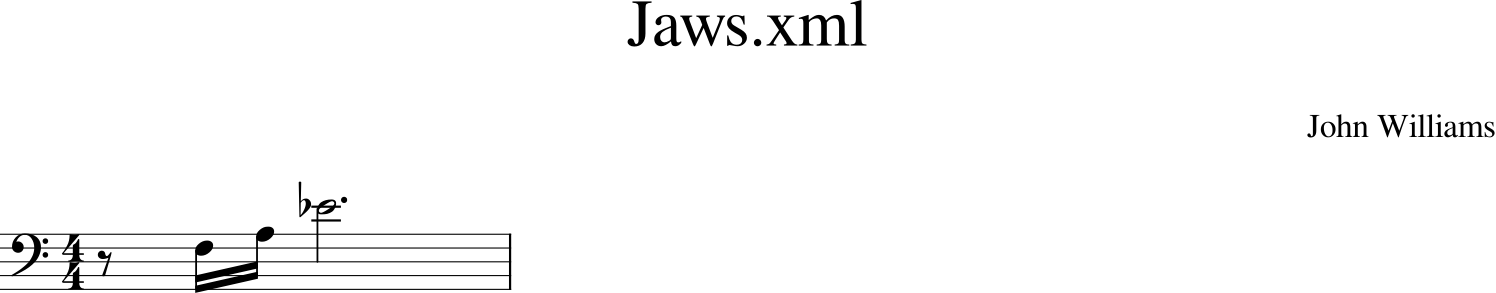

Compasso: [(30, 'P1-Staff1')]
-----


Instâncias: 27 | Padrão: 'FFFFFFFF'
{0.0} <music21.clef.BassClef>
{0.0} <music21.key.KeySignature of no sharps or flats>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Note B>
{0.5} <music21.note.Note C>
{1.0} <music21.note.Note B>
{1.5} <music21.note.Note C>
{2.0} <music21.note.Note B>
{2.5} <music21.note.Note C>
{3.0} <music21.note.Note B>
{3.5} <music21.note.Note C>



Compasso:  1    Clave/voz:  P1-Staff2


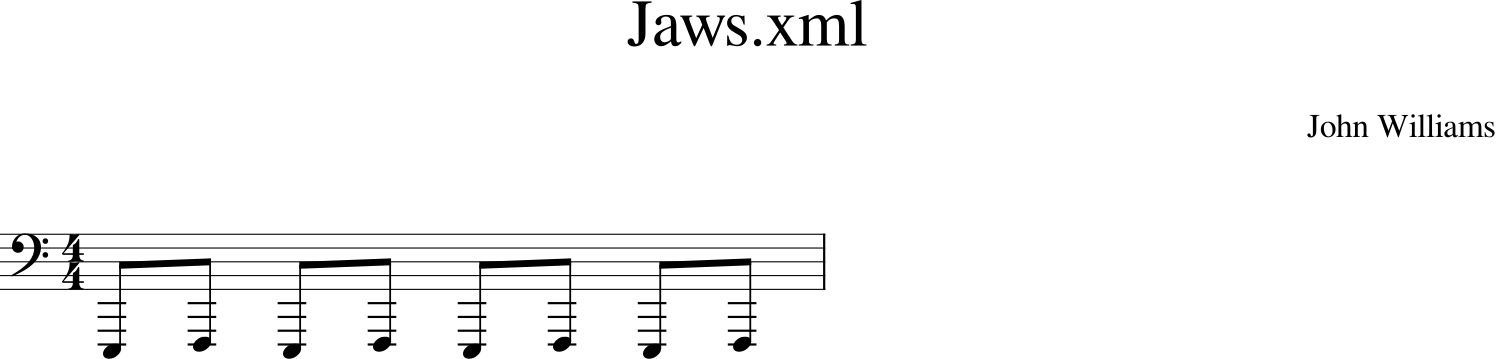


Compasso:  2    Clave/voz:  P1-Staff2


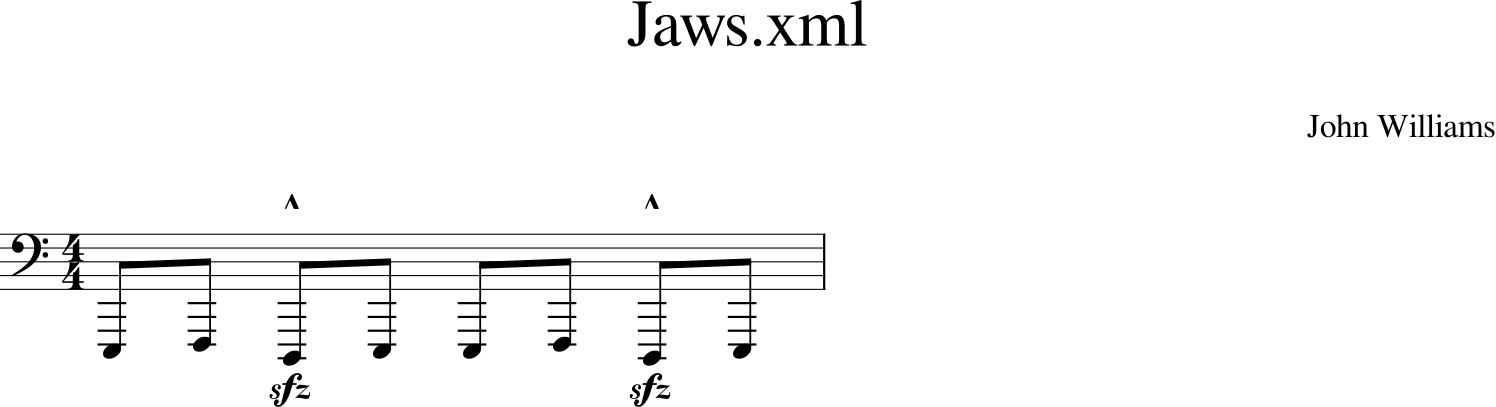


Compasso:  3    Clave/voz:  P1-Staff2


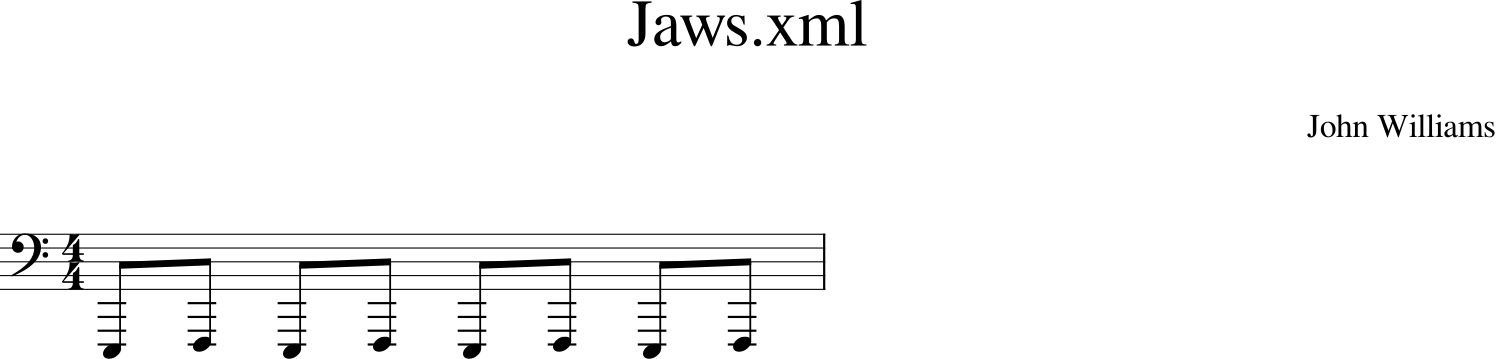


Compasso:  4    Clave/voz:  P1-Staff2


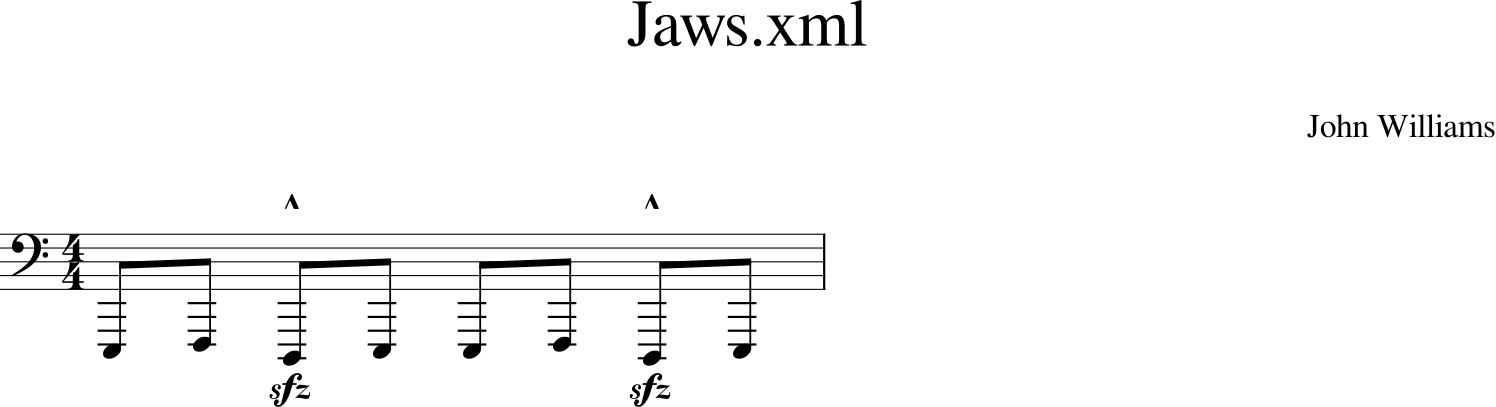


Compasso:  5    Clave/voz:  P1-Staff2


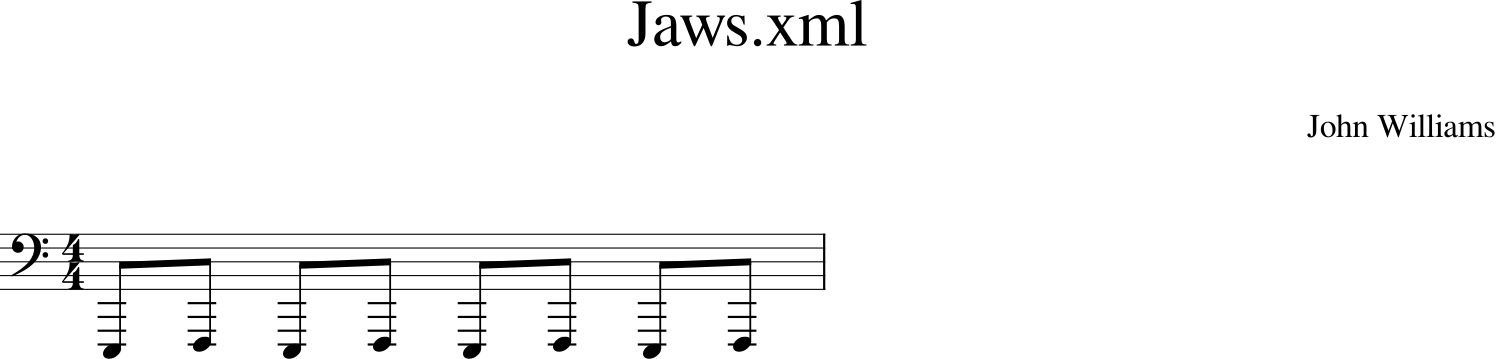


Compasso:  6    Clave/voz:  P1-Staff2


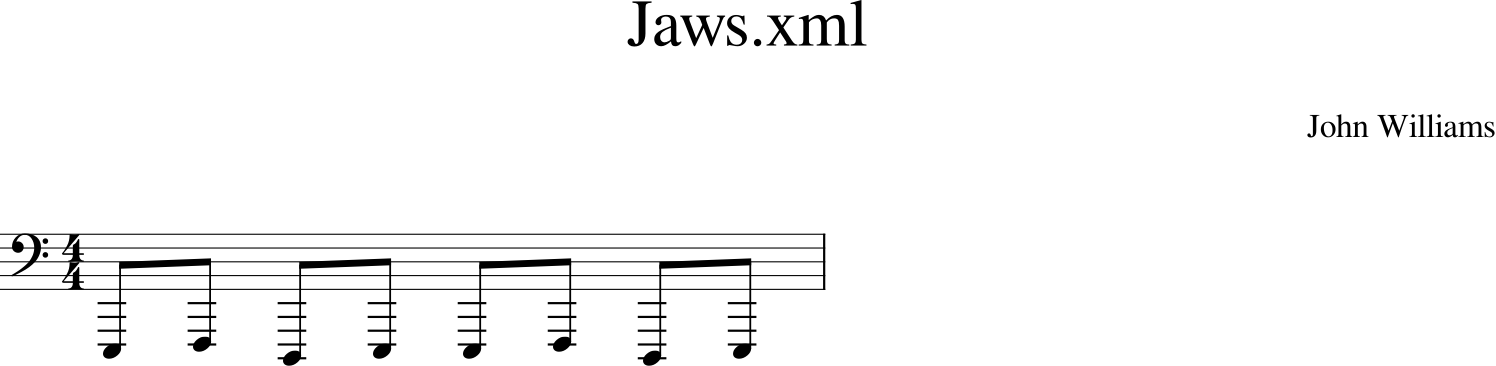


Compasso:  7    Clave/voz:  P1-Staff2


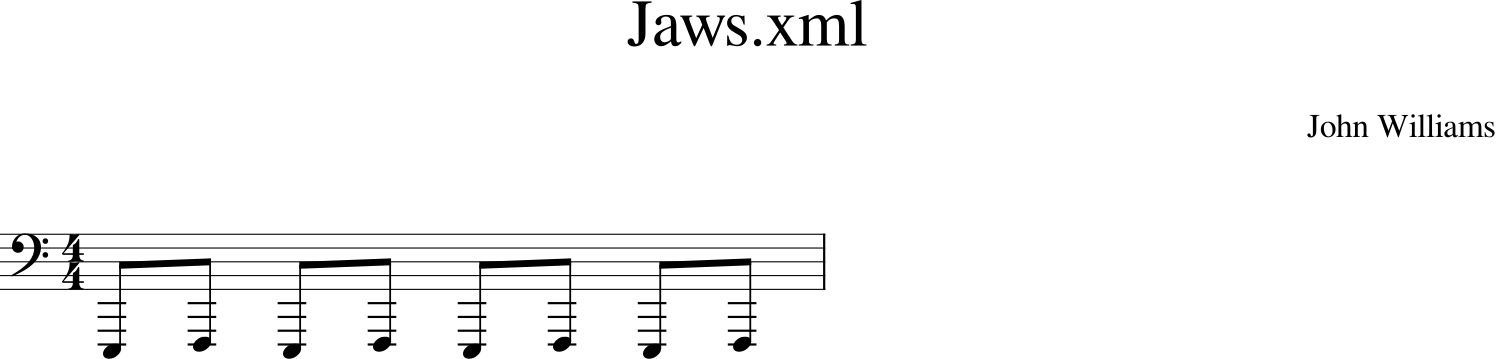


Compasso:  8    Clave/voz:  P1-Staff2


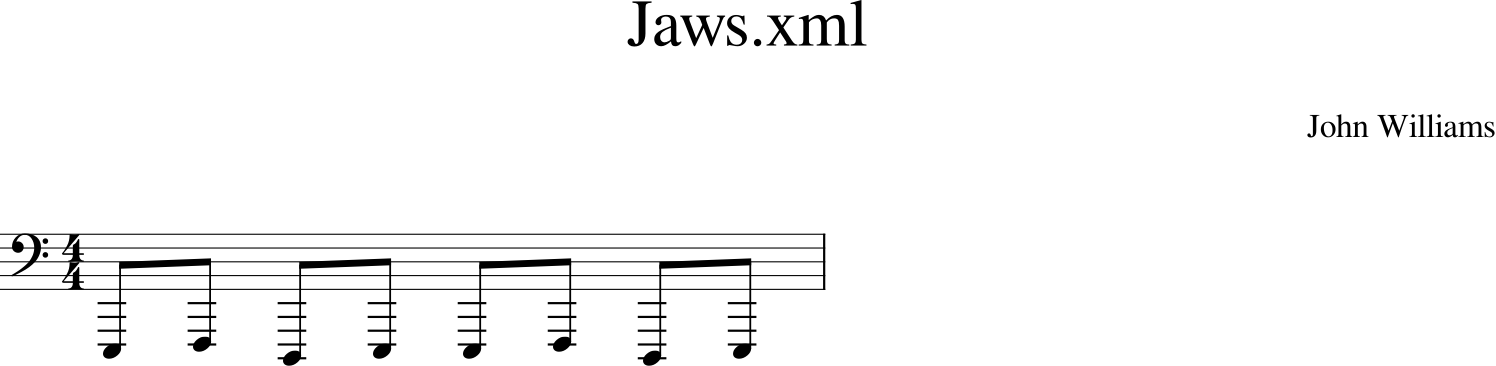


Compasso:  9    Clave/voz:  P1-Staff2


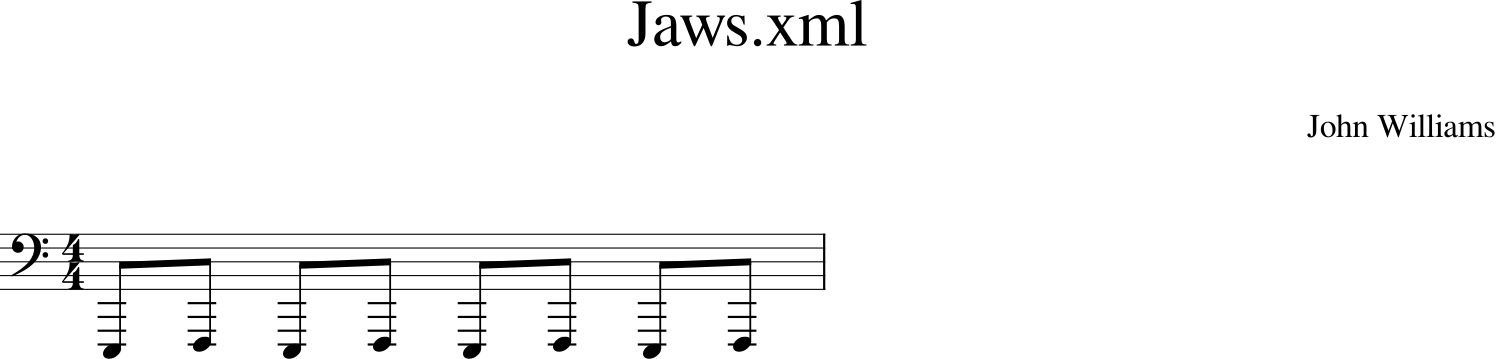


Compasso:  10    Clave/voz:  P1-Staff2


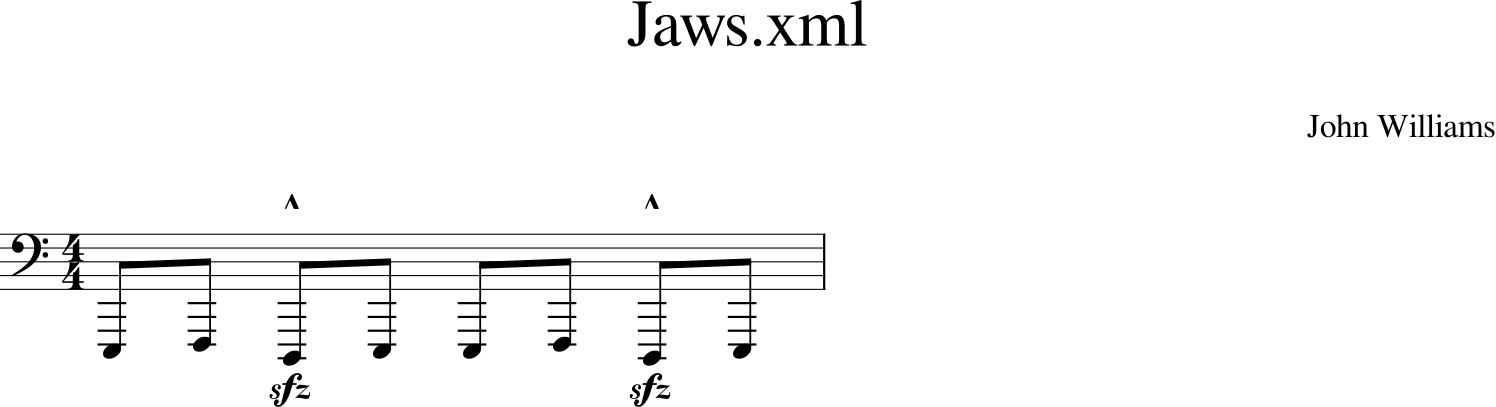


Compasso:  11    Clave/voz:  P1-Staff2


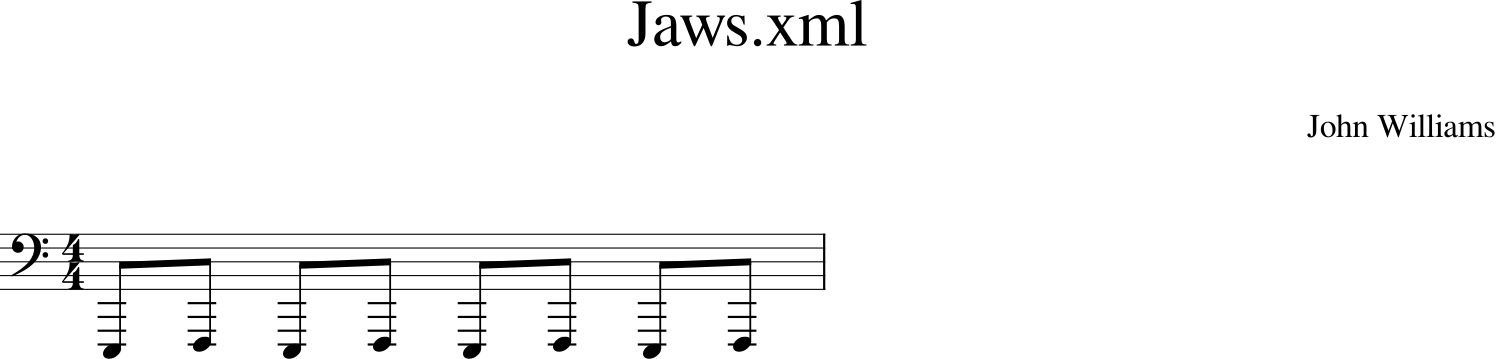


Compasso:  12    Clave/voz:  P1-Staff2


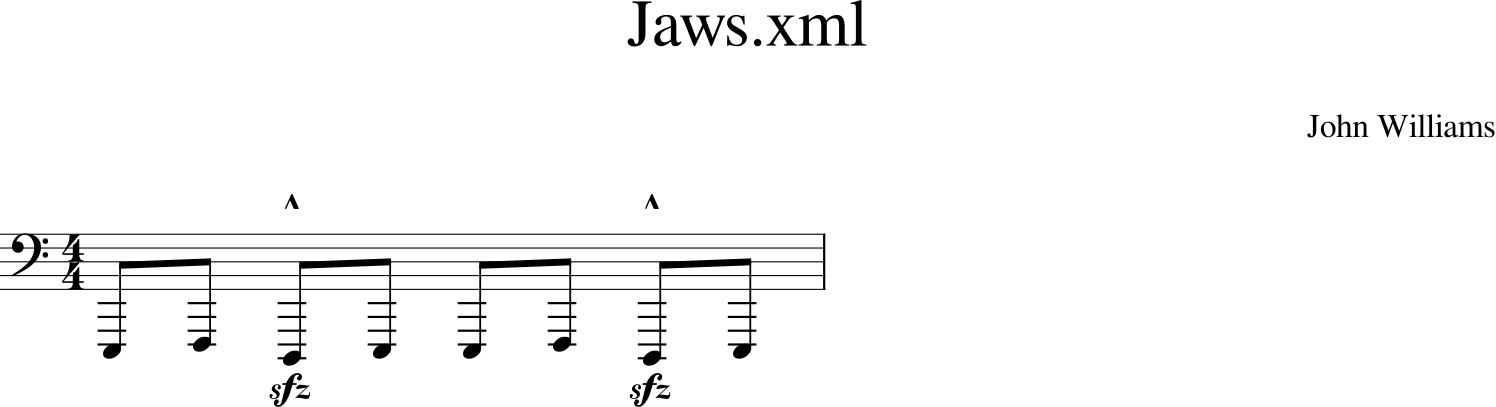


Compasso:  19    Clave/voz:  P1-Staff2


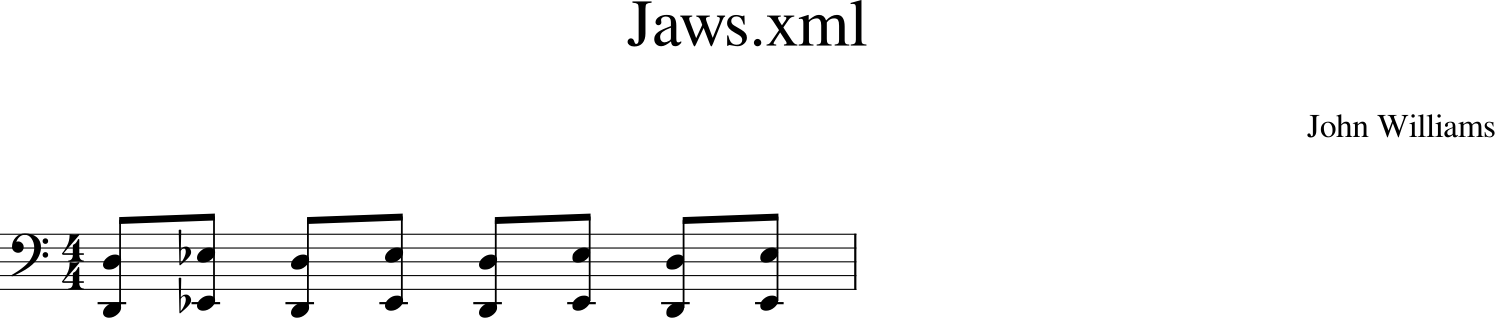


Compasso:  20    Clave/voz:  P1-Staff2


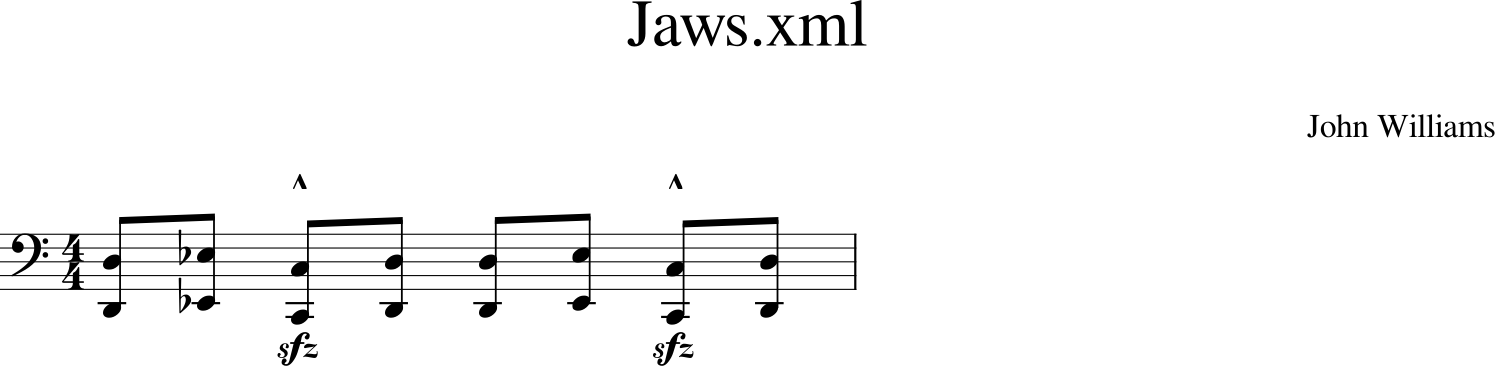


Compasso:  21    Clave/voz:  P1-Staff2


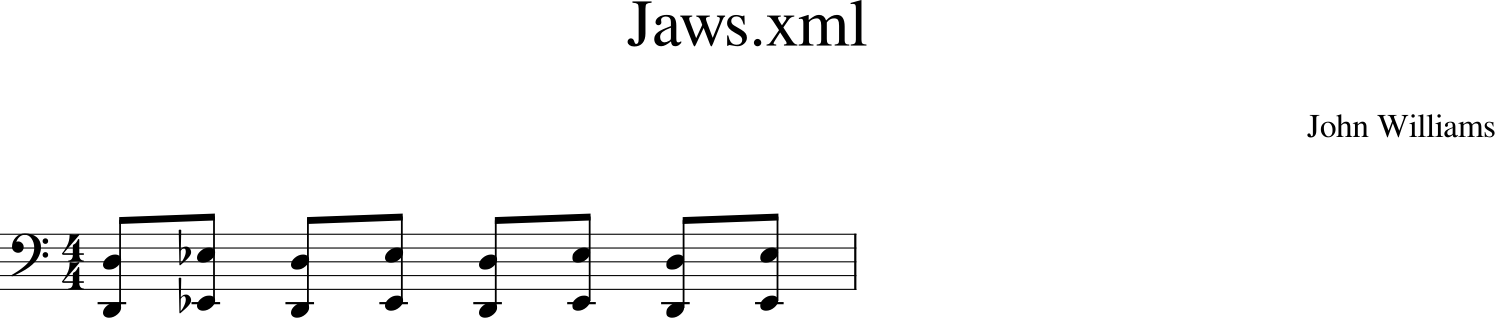


Compasso:  22    Clave/voz:  P1-Staff2


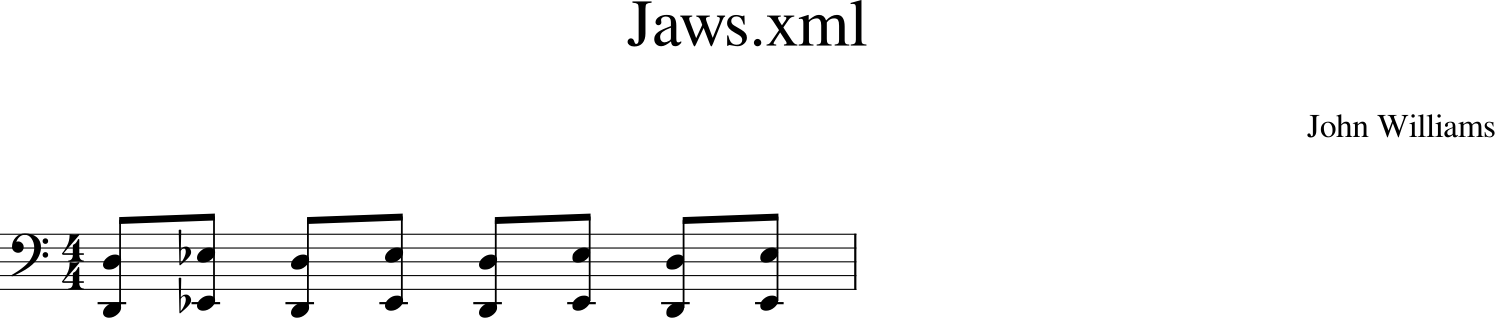


Compasso:  23    Clave/voz:  P1-Staff2


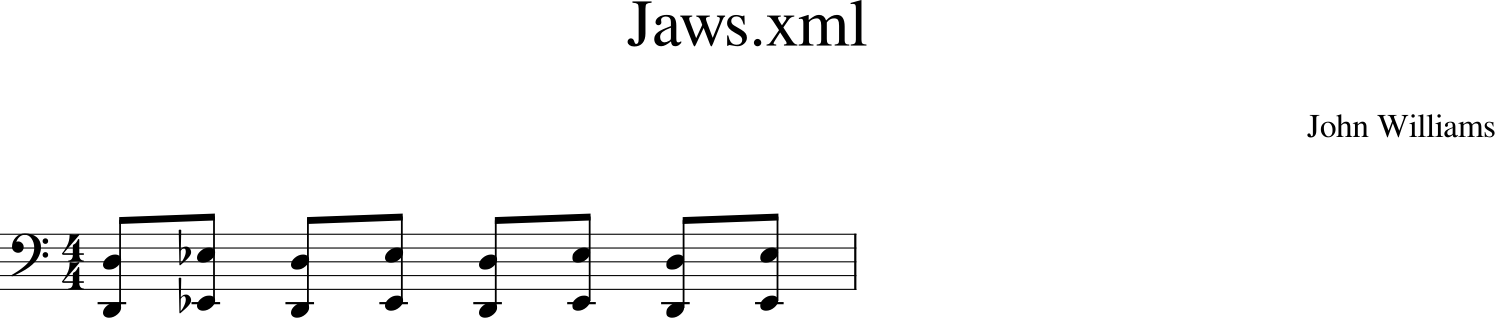


Compasso:  24    Clave/voz:  P1-Staff2


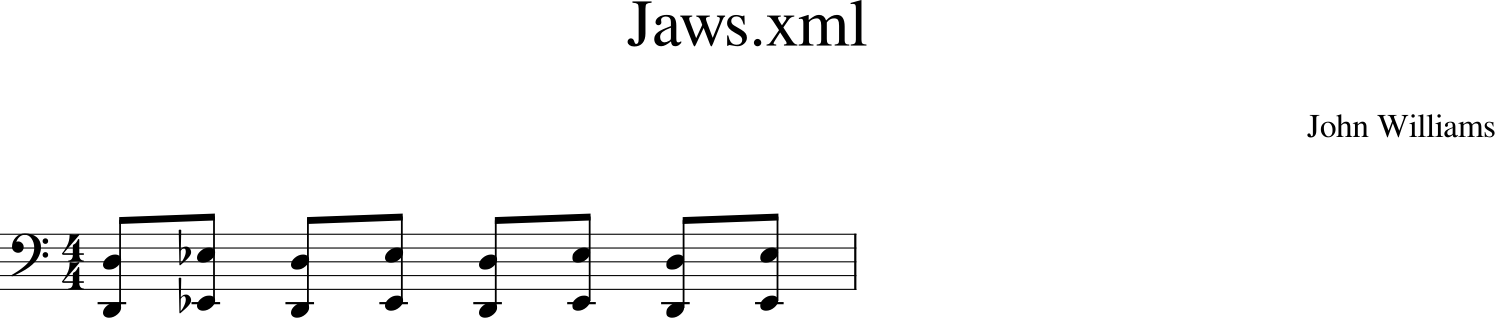


Compasso:  25    Clave/voz:  P1-Staff2


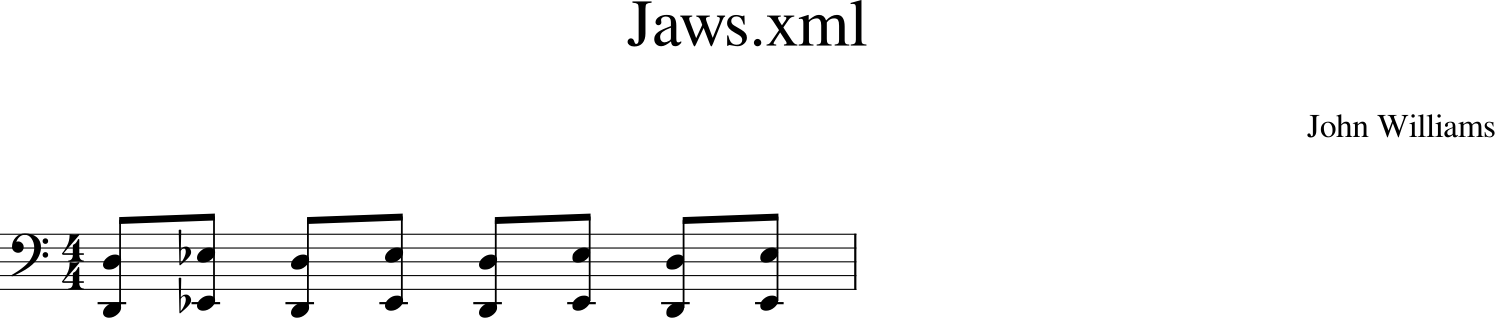


Compasso:  26    Clave/voz:  P1-Staff2


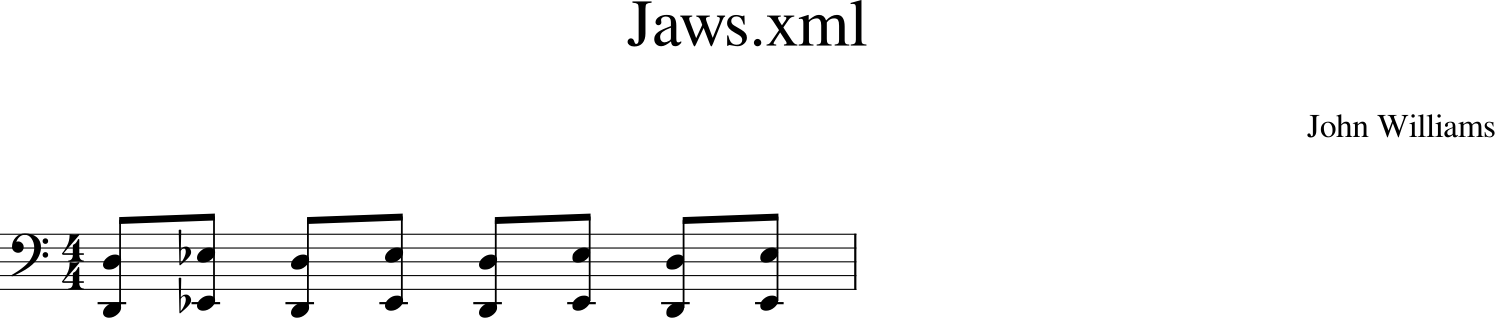


Compasso:  27    Clave/voz:  P1-Staff2


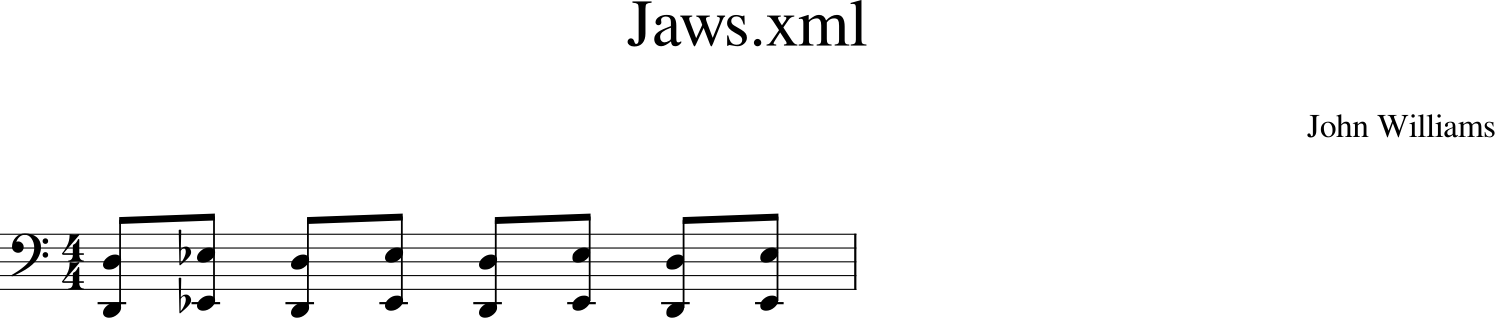


Compasso:  28    Clave/voz:  P1-Staff2


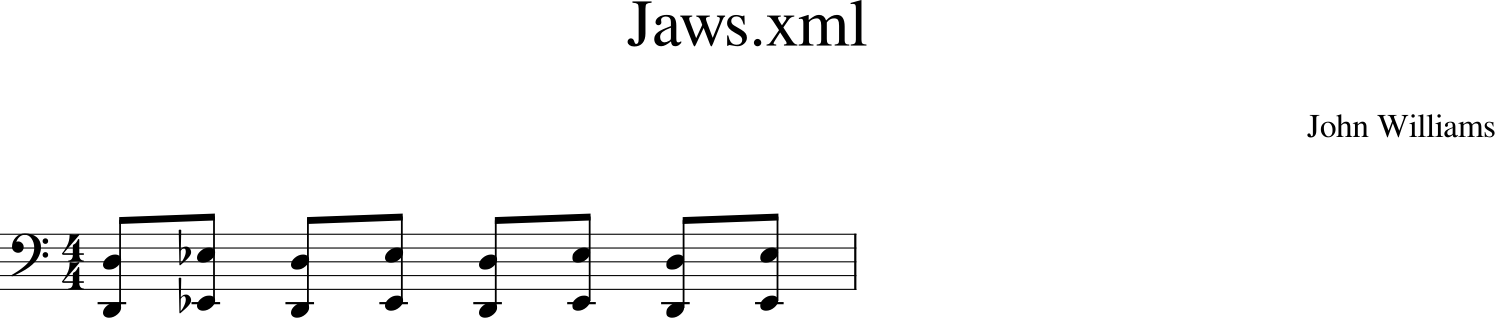


Compasso:  29    Clave/voz:  P1-Staff2


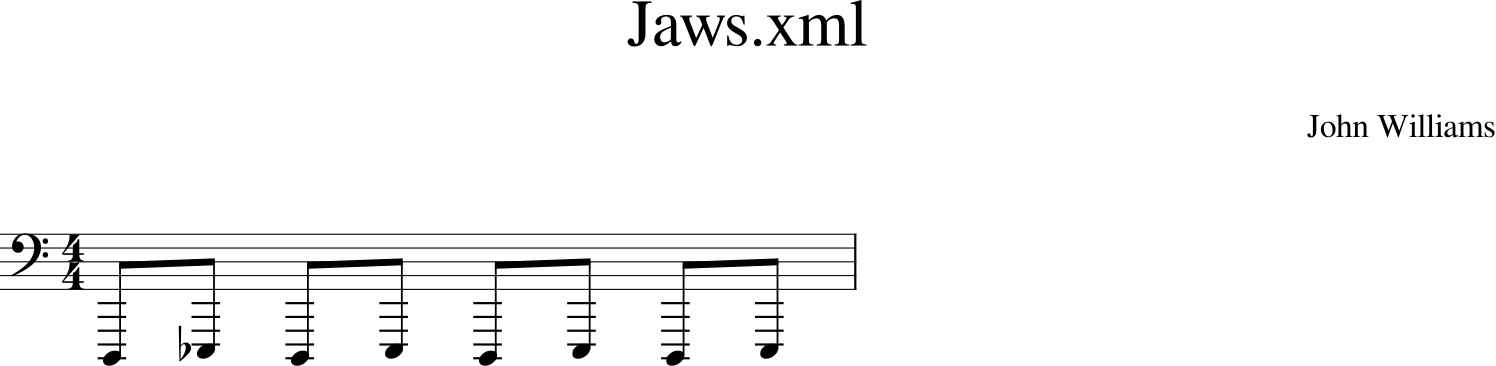


Compasso:  30    Clave/voz:  P1-Staff2


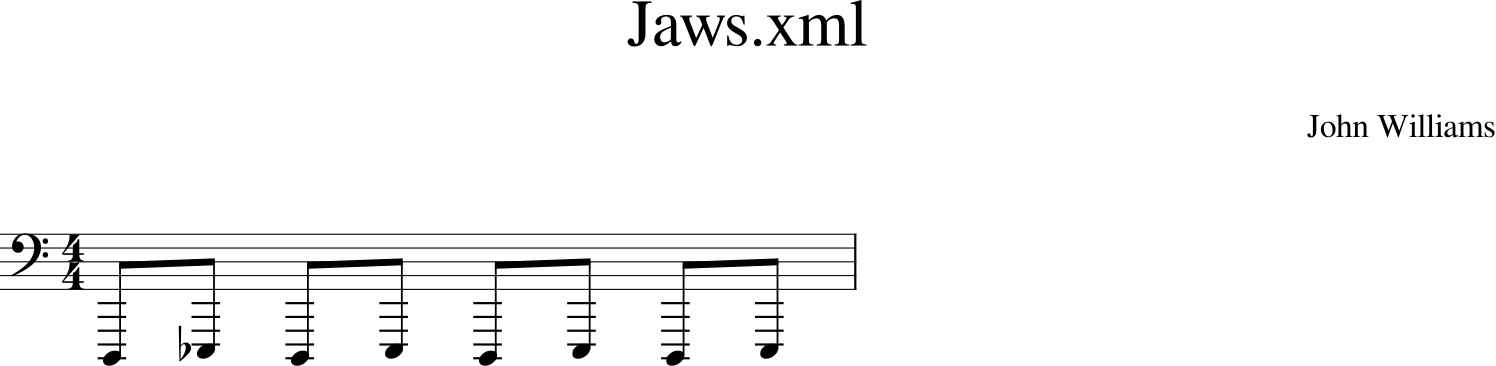


Compasso:  31    Clave/voz:  P1-Staff2


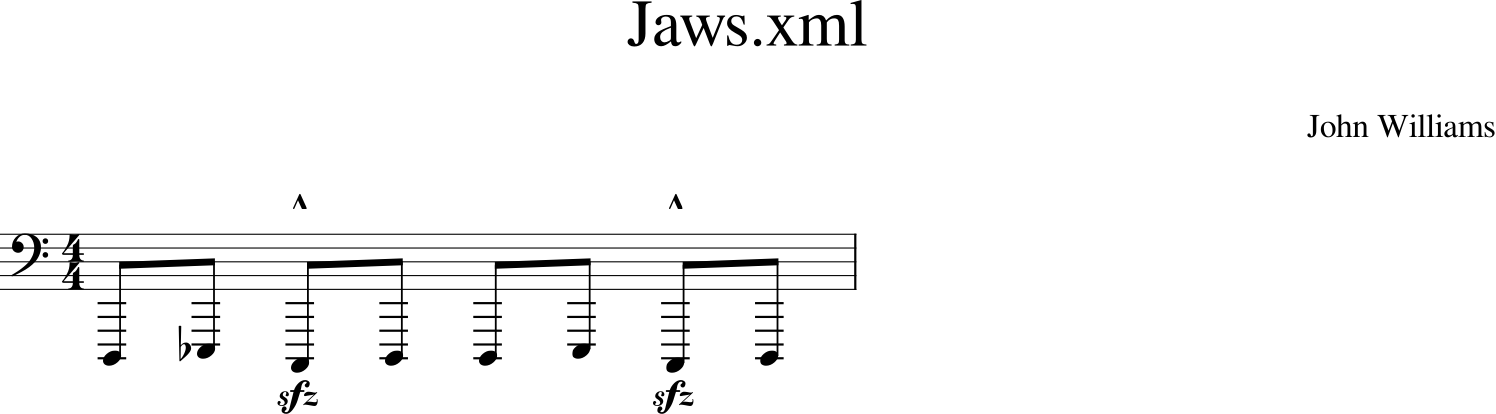


Compasso:  32    Clave/voz:  P1-Staff2


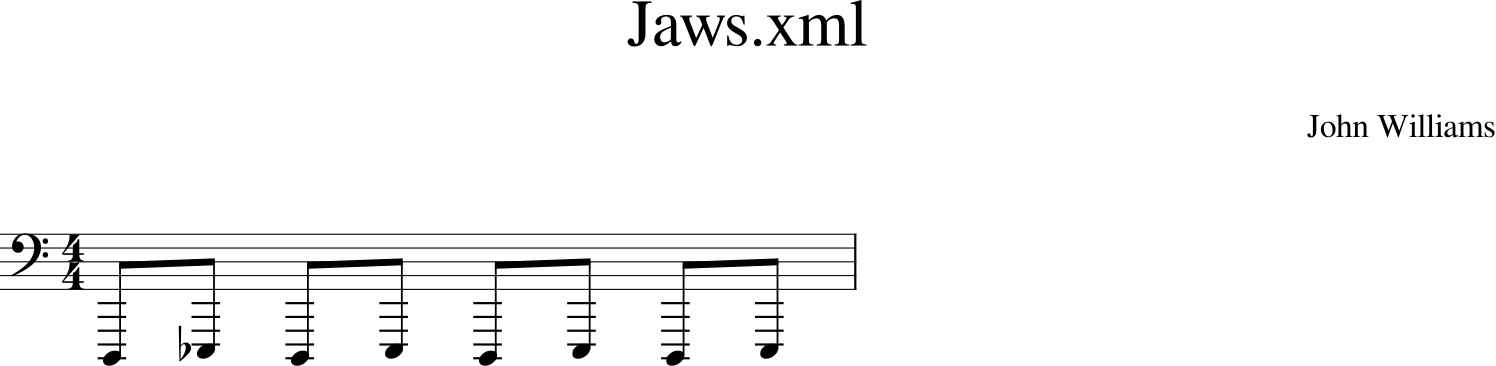


Compasso:  33    Clave/voz:  P1-Staff2


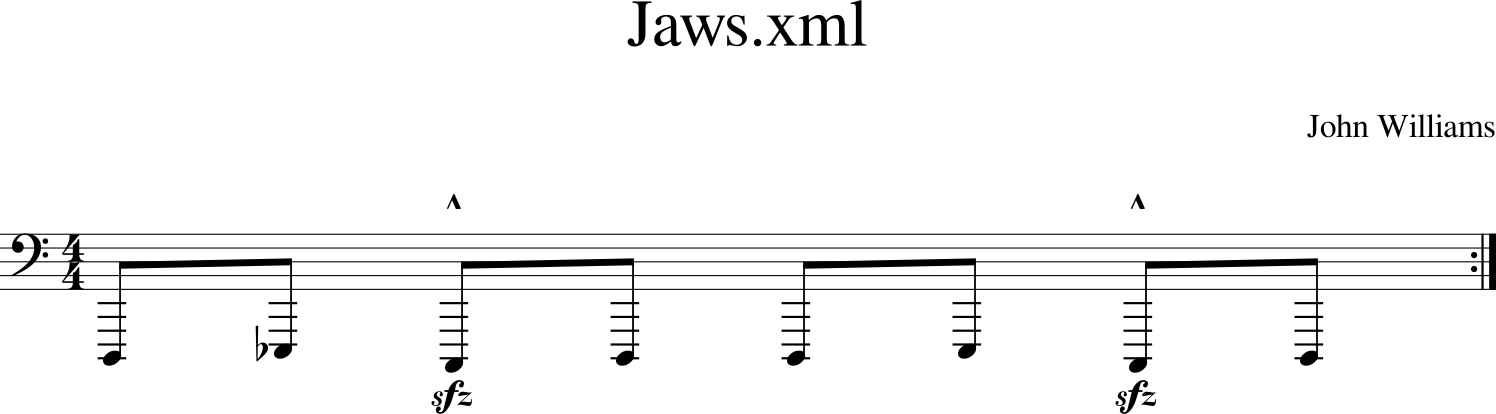

Compasso: [(1, 'P1-Staff2'), (2, 'P1-Staff2'), (3, 'P1-Staff2'), (4, 'P1-Staff2'), (5, 'P1-Staff2'), (6, 'P1-Staff2'), (7, 'P1-Staff2'), (8, 'P1-Staff2'), (9, 'P1-Staff2'), (10, 'P1-Staff2'), (11, 'P1-Staff2'), (12, 'P1-Staff2'), (19, 'P1-Staff2'), (20, 'P1-Staff2'), (21, 'P1-Staff2'), (22, 'P1-Staff2'), (23, 'P1-Staff2'), (24, 'P1-Staff2'), (25, 'P1-Staff2'), (26, 'P1-Staff2'), (27, 'P1-Staff2'), (28, 'P1-Staff2'), (29, 'P1-Staff2'), (30, 'P1-Staff2'), (31, 'P1-Staff2'), (32, 'P1-Staff2'), (33, 'P1-Staff2')]
-----


Instâncias: 4 | Padrão: ''
{0.0} <music21.stream.Voice 5>
    {0.0} <music21.note.Note E->
    {0.3333} <music21.note.Note G>
    {0.6667} <music21.note.Note B->
    {1.0} <music21.note.Note E>
    {1.3333} <music21.note.Note A>
    {1.6667} <music21.note.Note C#>
    {2.0} <music21.note.Note E->
    {2.3333} <music21.note.Note G>
    {2.6667} <music21.note.Note B->
    {3.0} <music21.note.Note E>
    {3.3333} <music21.note.Note A>
    {3.6667} <music21.note.Note C#>
{0.0}

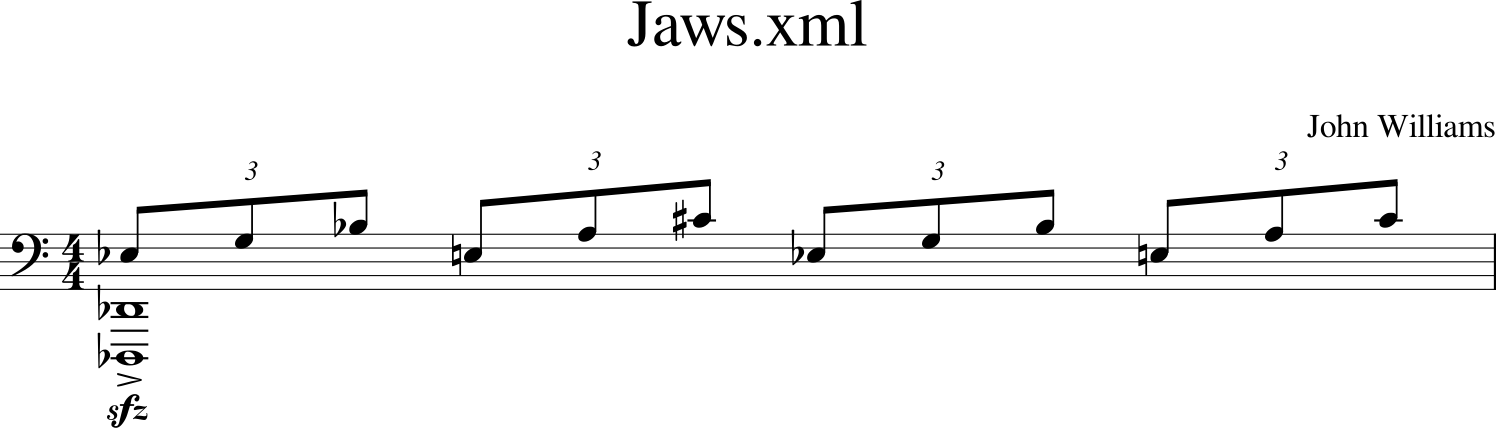


Compasso:  15    Clave/voz:  P1-Staff2


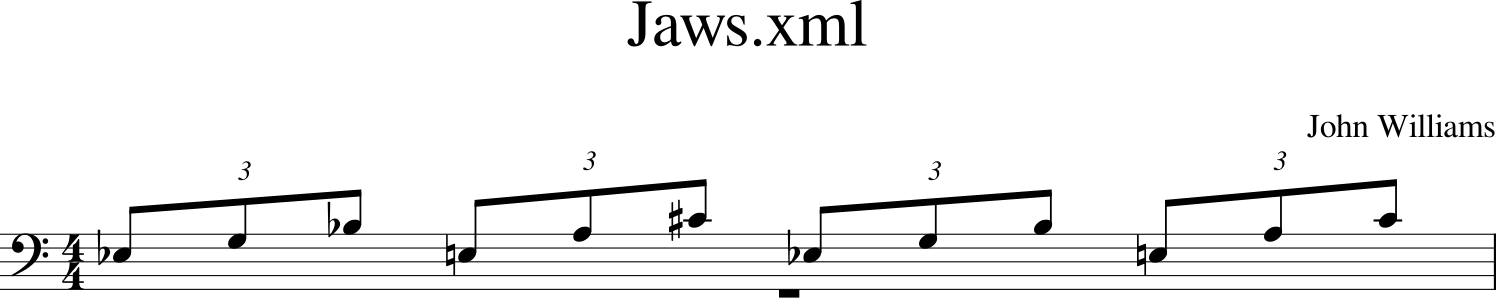


Compasso:  16    Clave/voz:  P1-Staff2


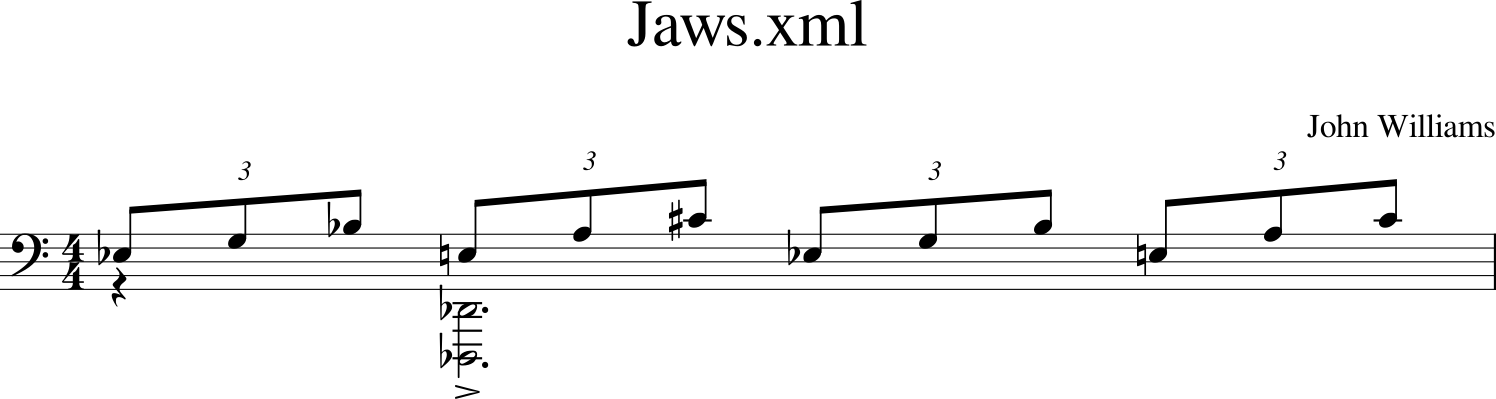


Compasso:  17    Clave/voz:  P1-Staff2


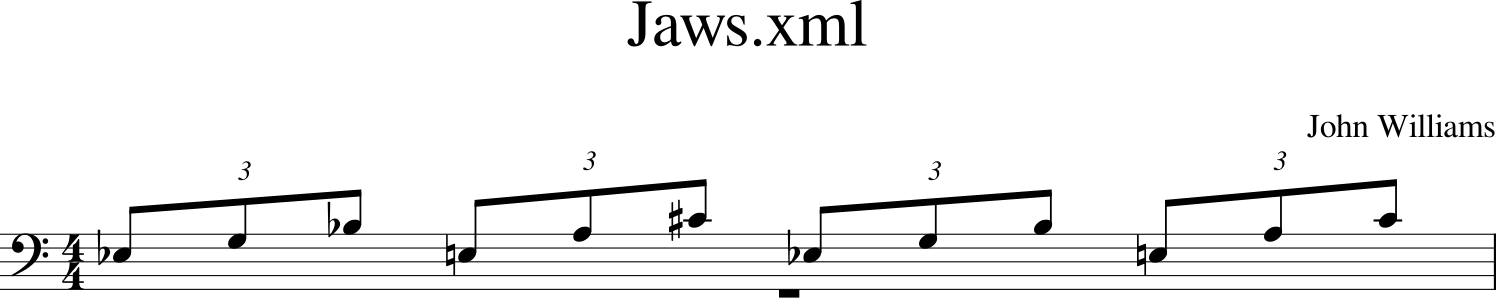

Compasso: [(14, 'P1-Staff2'), (15, 'P1-Staff2'), (16, 'P1-Staff2'), (17, 'P1-Staff2')]
-----


Instâncias: 2 | Padrão: '@@@@@@@@@@@@'
{0.0} <music21.layout.SystemLayout>
{0.0} <music21.note.Note D>
{0.3333} <music21.note.Note F#>
{0.6667} <music21.note.Note A>
{1.0} <music21.note.Note E->
{1.3333} <music21.note.Note G#>
{1.6667} <music21.note.Note C>
{2.0} <music21.note.Note D>
{2.3333} <music21.note.Note F#>
{2.6667} <music21.note.Note A>
{3.0} <music21.note.Note E->
{3.3333} <music21.note.Note G#>
{3.6667} <music21.note.Note C>



Compasso:  13    Clave/voz:  P1-Staff2


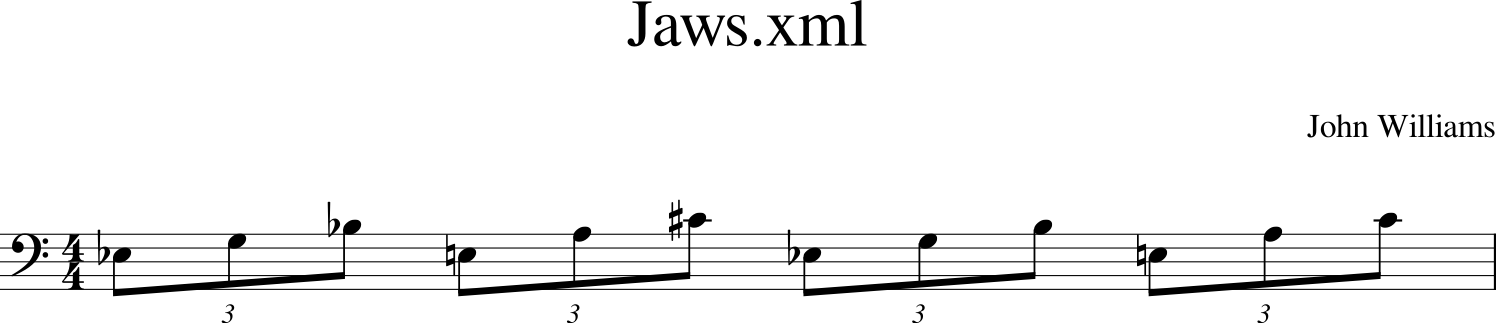


Compasso:  18    Clave/voz:  P1-Staff2


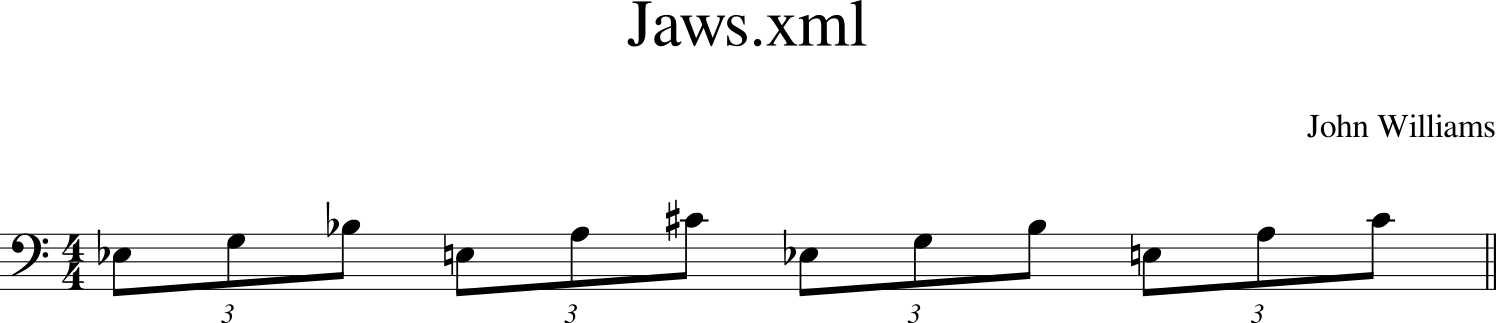

Compasso: [(13, 'P1-Staff2'), (18, 'P1-Staff2')]
-----




In [22]:
import copy

# from music21 import duration
from music21 import note
from music21.stream import Measure


def padroes_ritmicos(streamIn, transposeDiatonic=False):
  '''Refatoração de Função nativa mostCommonMeasureRhythms'''
  returnDicts = []
  distanceToTranspose = 0

  for thisMeasure in streamIn[Measure]:
      rhythmString = search.translateStreamToStringOnlyRhythm(thisMeasure.notesAndRests)
      rhythmFound = False
      for entry in returnDicts:
          if entry['rhythmString'] == rhythmString:
              rhythmFound = True
              entry['number'] += 1
              entry['measures'].append(thisMeasure)
              break
      if rhythmFound is False:
          newDict = {
              'number': 1,
              'rhythmString': rhythmString,
          }
          measureNotes = thisMeasure.notes
          foundNote = False
          highestNote = None
          for noteOrChord in measureNotes:
            #Verificação da presença de acordes além de notas
              if isinstance(noteOrChord, note.Note):
                  if not highestNote or noteOrChord.pitch.ps > highestNote.pitch.ps:
                      highestNote = noteOrChord
          if highestNote:
              distanceToTranspose = 72 - highestNote.pitch.ps
              foundNote = True
          if foundNote:
              thisMeasureCopy = copy.deepcopy(thisMeasure)
              for n in thisMeasureCopy.notes:
                  if isinstance(n, chord.Chord):
                      highestPitch = max(n.pitches, key=lambda pitch: pitch.ps)
                      n.transpose(distanceToTranspose - (highestPitch.ps - n.pitches[-1].ps), inPlace=True)
                  elif isinstance(n, note.Note):
                      n.transpose(distanceToTranspose, inPlace=True)
              newDict['rhythm'] = thisMeasureCopy
          else:
              newDict['rhythm'] = thisMeasure
          newDict['measures'] = [thisMeasure]
          returnDicts.append(newDict)

  sortedDicts = sorted(returnDicts, key=lambda k: k['number'], reverse=True)
  return sortedDicts
# -------------------

ritmos = []

# Part0
padroes_encontrados = padroes_ritmicos(target_)
for in_dict in padroes_encontrados:
    print(f"Instâncias: {in_dict['number']} | Padrão: '{in_dict['rhythmString']}'")
    in_dict['rhythm'].show('text')
    print('\n')
    for m in in_dict['measures']:
      print("\nCompasso: ", m.number,"   Clave/voz: ", m.getContextByClass(stream.Part).id)
      m.show()
    print('Compasso: %r' % ([(m.number,
                              str(m.getContextByClass(stream.Part).id))
                           for m in in_dict['measures']]))

    ritmos.append(in_dict)
    print('-----\n\n')

# Part1
padroes_encontrados = padroes_ritmicos(target_score.parts[1])
for in_dict in padroes_encontrados:
    print(f"Instâncias: {in_dict['number']} | Padrão: '{in_dict['rhythmString']}'")
    in_dict['rhythm'].show('text')
    print('\n')
    for m in in_dict['measures']:
      print("\nCompasso: ", m.number,"   Clave/voz: ", m.getContextByClass(stream.Part).id)
      m.show()
    print('Compasso: %r' % ([(m.number,
                              str(m.getContextByClass(stream.Part).id))
                           for m in in_dict['measures']]))

    ritmos.append(in_dict)
    print('-----\n\n')

## Contorno Ritmico

Bloco 15

In [23]:
lista_notas_pausas, nGram_duracao, ritmo_busca, duracao_lista_notas = [], [], [], []

exemplo = converter.parse('/content/drive/MyDrive/PROJETO/MC-MATERIALDECOMPARACAO/ritmo_busca.mxl')

for notas_ in target_.flatten().notesAndRests:
  lista_notas_pausas.append(notas_)

for note in exemplo.flatten().notes:
  ritmo_busca.append(note.quarterLength)

for ni in lista_notas_pausas:
  duracao_lista_notas.append(ni.quarterLength)

r_N = len(ritmo_busca)
for i in range(len(duracao_lista_notas)-r_N+1):
  '''i equivale à janela de Busca no tamanho N'''
  nGram_duracao.append(duracao_lista_notas[i:i+r_N])

for test, notas in zip(nGram_duracao, nGram_notas):
  if test == ritmo_busca:
    compasso = notas[0].measureNumber
    print("Compasso: ",compasso, "|  Tempo: ", notas[0].offset+1)
    target_.measure(compasso).show()
    target_.measure(compasso).show('midi')
    print("\n")